# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [743]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# **1. Zdefiniowanie celu analizy**

## **1.1. Pytania biznesowe, które mają być rozwiązane za pomocą danych**

Celem analizy jest pozyskanie odpowiedzi na poniższe pytanie, opracowane na podstawie udostępnionych danych.

> **Jakie cechy demograficzne (płeć, wiek) i społeczno-ekonomiczne (sponinowacenie, klasa biletu, cena biletu) pasażerów miały wpływ na ich szanse przeżycia katastrofy?**

## **1.2. Identyfikacja kluczowych zmiennych i wskaźników**

Należy przeprowadzić analizę rozkładu i zależności pomiędzy płcią (*'sex'*), wiekiem (*'age'*), liczbą osób sponinowaconych (*'sibsp'* i *'parch'*), klasą biletu (*'pclass'*) oraz ceny biletu (*'fare'*) a przeżywalnością (*'survived'*) np. za pomocą histogramów, wykresów słupkowych i pudełkowych.

# **2. Zbieranie i wstępne przetwarzanie danych**

## **2.1. Zbieranie danych**

Dostępny jest zbiór danych o pasażerach RMS Tytanic. Titanic przewoził łącznie ponad 2,200 osób, z czego ponad 1,500 zginęło. Zbiór zawiera 1,310 rekordów.

In [298]:
# Import danych z pliku do DataFrame
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


## **2.2. Weryfikacja jakości danych**

In [6]:
# Informacje o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [299]:
# Prezentacja 10 losowych rekordów
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1289,3.0,0.0,"Wiklund, Mr. Karl Johan",male,21.0,1.0,0.0,3101266,6.4958,NaN,S,NaN,NaN,NaN
965,3.0,0.0,"Lievens, Mr. Rene Aime",male,24.0,0.0,0.0,345781,9.5000,NaN,S,NaN,NaN,NaN
520,2.0,1.0,"Nourney, Mr. Alfred (""Baron von Drachstedt"")",male,20.0,0.0,0.0,SC/PARIS 2166,13.8625,D38,C,7,NaN,"Cologne, Germany"
1074,3.0,0.0,"O'Connor, Mr. Patrick",male,NaN,0.0,0.0,366713,7.7500,NaN,Q,NaN,NaN,NaN
568,2.0,0.0,"Swane, Mr. George",male,18.5,0.0,0.0,248734,13.0000,F,S,NaN,294.0,NaN
1083,3.0,0.0,"Olsen, Mr. Henry Margido",male,28.0,0.0,0.0,C 4001,22.5250,NaN,S,NaN,173.0,NaN
1166,3.0,0.0,"Saade, Mr. Jean Nassr",male,NaN,0.0,0.0,2676,7.2250,NaN,C,NaN,NaN,NaN
163,1.0,1.0,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1.0,0.0,113789,52.0000,NaN,S,8,NaN,"New York, NY"
825,3.0,0.0,"Goodwin, Master. Harold Victor",male,9.0,5.0,2.0,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
185,1.0,0.0,"Lindeberg-Lind, Mr. Erik Gustaf (""Mr Edward Li...",male,42.0,0.0,0.0,17475,26.5500,NaN,S,NaN,NaN,"Stockholm, Sweden"


## 2.2.1. Identyfikacja brakujących wartości

### Analiza ogólna

In [300]:
# Informacje o wartościach brakujących w każdej kolumnie
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

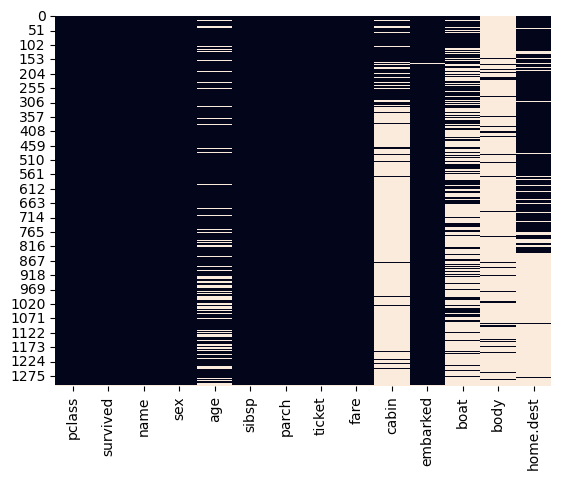

In [301]:
# Heatmapa brakujących wartości w każdej kolumnie
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Analiza wybranych kolumn

#### 'pclass'

In [302]:
# Informacje o wartościach brakujących w kolumnie 'pclass'
brakujace_pclass_df = df[df["pclass"].isnull() == True]
brakujace_pclass_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 'survived'

In [303]:
# Informacje o wartościach brakujących w kolumnie 'survived'
brakujace_survived_df = df[df["survived"].isnull() == True]
brakujace_survived_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 'sex'

In [304]:
# Informacje o wartościach brakujących w kolumnie 'sex'
brakujace_sex_df = df[df["sex"].isnull() == True]
brakujace_sex_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 'age'

In [305]:
# Informacje o wartościach brakujących w kolumnie 'age'
brakujace_age_df = df[df["age"].isnull() == True]
brakujace_age_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3.0,0.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN


#### 'sibsp'

In [307]:
# Informacje o wartościach brakujących w kolumnie 'sibsp'
brakujace_sibsp_df = df[df["sibsp"].isnull() == True]
brakujace_sibsp_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 'parch'

In [308]:
# Informacje o wartościach brakujących w kolumnie 'parch'
brakujace_parch_df = df[df["parch"].isnull() == True]
brakujace_parch_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 'fare'

In [309]:
# Informacje o wartościach brakujących w kolumnie 'fare'
brakujace_fare_df = df[df["fare"].isnull() == True]
brakujace_fare_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Wnioski**

Z racji na cel analizy ciężar zainteresowania brakującymi wartościami dotyczy niniejszych kolumn wraz z podsumowaniem braków: 'pclass' - 1, 'survived' - 1, 'sex' - 1, 'age' - 264, 'fare' - 2, 'sibsb' - 1, 'parch' - 1

- Braki danych dla wszystkich w/w zmiennych mieszczą się w rekordzie 1309. W związku z tym, że niniejszy rekord nie ma żadnych danych zaleca się jego usunięcie z DataFrame.
- Brak danych w kolumnie 'age' (264) jest dość duży (20%). Jednakże na podstawie tego DataFrame nie ma możliwości w sposób logiczny zastąpienia braków danymi zastępczymi. Zatem, odpowiedź na pytanie 1 można uzyskać 1) akceptując brak danych lub 2) usuwając rekordy, w których w kolumnie 'age' występuje brak danych. Z racji na fakt, iż zmienna 'age' jest jedną z 4 badanych zmiennych, pozstawiam DataFrame z tymi brakami.
- Brak danych w kolumnie 'fare' (2) jest nieistotny z perspektywy ilościowej i wpływ tego braku na wyniki będzie relatywnie niewielki.

In [310]:
# UWAGA - nowy DataFrame
# Usunięcie z DataFrame pustego rekordu o indeksie 1309
df1 = df.drop(index=1309)
df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


## 2.2.2. Poszukiwanie duplikatów

In [311]:
# Informacje o liczbie unikalnych wartości dla poszczególnych kolumn
df1.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

**Wnioski**
- Z racji na fakt iż w zbiorze jest 1,309 rekordów, to należy przyjąć, że cechą unikalną dla każdego rekordu są wartości z kolumny 'name'. Duplikaty tej wartości są przedmiotem poszukiwań i ewentualnych działań następczych. 
- Cechą pomocniczą, która może pomóc w wyodrębnieniu unikalnych rekordów w przypadku gdy powstaną duplikaty w wartościach kolumny 'name' są wartości z kolumny 'ticket' zakładając, że numer biletu sam w sobie jest unikalny (przydzielony pojedynczemu pasażerowi) i nie powinien się powtórzyć.

#### 'name'

In [312]:
# Informacje o duplikatach wartości w kolumnie 'name'
df1.duplicated(subset=["name"]).sum()

2

In [313]:
# Prezentacja duplikowanych wartości w kolumnie 'name'
duplicatyName = df1[df1.duplicated(subset=["name"], keep=False)]
duplicatyName

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3.0,1.0,"Connolly, Miss. Kate",female,22.0,0.0,0.0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3.0,0.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


#### 'ticket'

In [314]:
# Informacje o duplikatach wartości w kolumnie 'ticket'
df1.duplicated(subset=["ticket"]).sum()

380

In [315]:
# Prezentacja duplikowanych wartości w kolumnie 'ticket'
duplicatyName = df1[df1.duplicated(subset=["ticket"], keep=False)]
duplicatyName[["ticket", "pclass", "survived", "name", "sex", "age",	"sibsp", "parch", "fare", "cabin", "embarked", "boat", "body", "home.dest"]]

,ticket,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,24160,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,113781,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,113781,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,113781,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,113781,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,2659,3.0,0.0,"Yasbeck, Mr. Antoni",male,27.0000,1.0,0.0,14.4542,NaN,C,C,NaN,NaN
1300,2659,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1.0,0.0,14.4542,NaN,C,NaN,NaN,NaN
1303,2627,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,14.4583,NaN,C,NaN,NaN,NaN
1304,2665,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,14.4542,NaN,C,NaN,328.0,NaN


**Wnioski**
- Występują 2 duplikaty wartości kolumny 'name'. Jednakże z racji na fakt iż każdy rekord tejże wartości ma inne dane w kolumnach 'age', 'ticket' i 'fare' należy przypuszczać, że faktycznie nie są to duplikaty.
- Przypuszczenie, że numer biletu sam w sobie jest unikalny (przydzielony pojedynczemu pasażerowi) i nie powinien się powtórzyć jest fałszywe. Duplikowane wartości w kolumnie 'tickiet' wskazują, iż numer biletu był nadawany ten sam wszystkim członkom jednej rodziny (być może nadawany z chwilą jego nabycia). Zatem wartości z kolumny 'ticket' nie mogą identyfikować rekordów DataFrame.

## 2.2.3. Weryfikacja spójności i poprawności danych

In [316]:
# Informacje o typach danych dla każdej kolumny
df1.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

#### 'pclass'

In [317]:
'''
Zmienna 'pclass' oznacza klasę biletu. Posiada 3 wartości unikalne typu 'float'. W związku z tym, należy 
dokonać transformacji typu danych z 'float' na 'int' (aby wyeliminować pomyłki wynikające
z wprowadzenia wartości dziesiętnych) i sprawdzić, czy wartości nie wychodzą poza zakres 
1 - 3.
'''
# Zmiana typu danych z 'float' na 'int'
df1["pclass"] = df1["pclass"].astype(int)

# Inormacje, czy wartości kolumny 'pclass' mieszczą się w przedziale 1 - 3
zakres_nietypowych_pclass_df = df1[(df1["pclass"] > 3) | (df1["pclass"] < 1)]
zakres_nietypowych_pclass_df["pclass"].sum()

0

#### 'survived'

In [318]:
'''
Zmienna 'survived' oznacza, czy pasażer przeżył katastrofę. Posiada 2 wartości unikalne typu 'float'. W związku z tym, należy 
dokonać transformacji typu danych z 'float' na 'int' (aby wyeliminować pomyłki wynikające
z wprowadzenia wartości dziesiętnych) i sprawdzić, czy wartości nie wychodzą poza zakres 
0 - 1.
'''
# Zmiana typu danych z 'float' na 'int'
df1["survived"] = df1["survived"].astype(int)

# Informacje, czy wartości kolumny 'survived' mieszczą się w przedziale 0 - 1
zakres_nietypowych_survived_df = df1[(df1["survived"] > 1) | (df1["survived"] < 0)]
zakres_nietypowych_survived_df["survived"].sum()

0

#### 'sex'

In [319]:
'''
Zmienna 'sex' oznacza płeć pasażera. Posiada 2 wartości unikalne typu 'object' (w tym przypadku 'str'). W związku 
z tym, nie ma konieczności dokonywania transformacji typu danych. Jednakże należy sprawdzić,
czy zmienna nie przechowuje wartości z poza zakresu "male" i "female".
'''
# Informacje, czy w kolumnie 'sex' nie znajdują się wartości z poza zbioru 'male' i 'female'
zakres_nietypowych_sex_df = df1[~df1["sex"].isin(["male", "female"])]
zakres_nietypowych_sex_df["sex"].sum()

0

#### 'age'

In [320]:
'''
Zmienna 'age' oznacza wiek pasażera. Posiada 98 wartości unikalnych typu 'float'. Z racji na fakt, iż w wartościach
znajdują się również wartości typu 'float', nie ma konieczności transformacji typu danych.
Jednakże należy sprawdzić, czy zmienna nie przechowuje wartości 'nielogicznych', czyli w tym
przypadku wychodzących poza zakres 0 - 100.
'''
# Informacje, czy wartości kolumny 'age' mieszczą się w przedziale 0 - 100
zakres_nietypowych_age_df = df1[(df1["age"] > 100) | (df1["age"] < 0)]
zakres_nietypowych_age_df["age"].sum()

0.0

#### 'sibsp'

In [321]:
'''
Zmienna 'sibsp' oznacza liczbę rodzeństwa / małżonków na pokładzie. Posiada 7 unikalnych 
wartości typu 'float'. W związku z tym, należy dokonać transformacji typu danych z 'float' 
na 'int' (aby wyeliminować pomyłki wynikające z wprowadzenia wartości dziesiętnych) oraz 
sprawdzić, czy zmienna nie przechowuje wartości ujemnych.
'''
# Zmiana typu danych z 'float' na 'int'
df1["sibsp"] = df1["sibsp"].astype(int)
# Informacje, czy wartości kolumny 'sibsp' są dodadnie
zakres_nietypowych_sibsp_df = df1[df1["sibsp"] < 0]
zakres_nietypowych_sibsp_df["sibsp"].sum()

0

#### "parch"

In [322]:
'''
Zmienna 'parch' oznacza liczbę rodziców/dzieci na pokładzie. Posiada 8 unikalnych wartości
typu 'float'. W związku z tym, należy dokonać transformacji typu danych z 'float' 
na 'int' (aby wyeliminować pomyłki wynikające z wprowadzenia wartości dziesiętnych) oraz 
sprawdzić, czy zmienna nie przechowuje wartości ujemnych.
'''
# Zmiana typu danych z 'float' na 'int'
df1["parch"] = df1["parch"].astype(int)
# Informacje, czy wartości kolumny 'sibsp' są dodadnie
zakres_nietypowych_parch_df = df1[df1["parch"] < 0]
zakres_nietypowych_parch_df["parch"].sum()

0

#### 'fare'

In [323]:
'''
Zmienna 'fare' oznacza cenę biletu. Posiada 281 wartości unikalnych typu 'float'. Z racji na fakt, iż w wartościach
znajdują się również wartości typu 'float', nie ma konieczności transformacji typu danych.
Jednakże należy sprawdzić, czy zmienna nie przechowuje wartości ujemnych.
'''
# Informacje, czy wartości kolumny 'fare' są dodadnie
zakres_nietypowych_pclass_df = df1[df1["fare"] < 0]
zakres_nietypowych_pclass_df["fare"].sum()

0.0

In [324]:
# Informacje o typach danych dla każdej kolumny po transformacji typów danych
df1.dtypes

pclass         int32
survived       int32
name          object
sex           object
age          float64
sibsp          int32
parch          int32
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

**Wnioski**

Z racji na cel analizy ciężar weryfikacji spójności i poprawności danych dotyczy poniżej wyszczególnionych kolumn wraz z podsumowaniem braków: 
- 'pclass'   - występują 3 unikalne wartości z zakresu 1 - 3 typu 'int
- 'survived' - występują 2 unikalne wartości z zakresu 0 - 1 typu 'int'
- 'sex'      - występują 2 unikalne wartości "male" / "female" typu 'object'
- 'age'      - występuje 98 uniklanych wartości typu 'float'
- 'sibsb'    - występuje 7 uniklanych wartości typu 'int'
- 'parch'    - występuje 8 uniklanych wartości typu 'int'
- 'fare'     - występuje 281 unikalnych wartości typu 'float'

In [325]:
# UWAGA - nowy DataFrame
'''
Nowy DataFrame z usuniętymi kolumnami 'ticket', 'cabin', 'embarked', 'boat', 'body', 
'home.dest'
'''
df2 = df1.drop(columns=["ticket", "cabin", "embarked", "boat", "body", "home.dest"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int32  
 1   survived  1309 non-null   int32  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int32  
 6   parch     1309 non-null   int32  
 7   fare      1308 non-null   float64
dtypes: float64(2), int32(4), object(2)
memory usage: 61.5+ KB


In [326]:
# UWAGA - nowy DataFrame
'''
Nowy DataFrame ze zmienionymi wartościami w kolumnie 'sex' z wartości 'female' na '0' oraz
z wartości 'male' na '1'. Zmieniono typ danych z 'object' na 'int'
'''
df3 = df2
df3["sex"] = df3["sex"].replace("female", 0)
df3["sex"] = df3["sex"].replace("male", 1)
df3["sex"] = df3["sex"].astype(int)
df3["sex"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: sex
Non-Null Count  Dtype
--------------  -----
1309 non-null   int32
dtypes: int32(1)
memory usage: 5.2 KB


# **3. Statystyczne podsumowanie danych**

## **3.1. Podstawowe statystyki opisowe**

### **3.1.1. Średnia, mediana, odchylenie standardowe, minima, maksima, kwartyle**

In [358]:
# Podsumowanie każdej kolumny numerycznej
df3.describe()

,pclass,survived,sex,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,0.644003,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,0.478997,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200


**Wnioski**
- 'age' - średnia wieku pasażera to prawie 30 lat, z czego 50% z nich miało 28 lub mniej lat, a 75% z nich miało nie więcej niż 39 lat
- 'sibsp' - mniej niż 25% pasażerów miało więcej niż 1 osobę z rodzeństwa lub małżonka na pokładzie
- 'parch' - mniej niż 25% pasażerów miało rodziców lub dzieci na pokładzie 
- 'fare'  - ponad 75% pasażerów wykupiło bilet w cenie niższej od średniej (33.295479), co świadczy o dużej dysproporcji cenowej biletów

### **3.1.2. Identyfikacja rozkładów zmiennych**

Katastrofę przeżyło: 500, co stanowi 38.0 % ogółu pasażerów


<Axes: ylabel='Przeżywalność'>

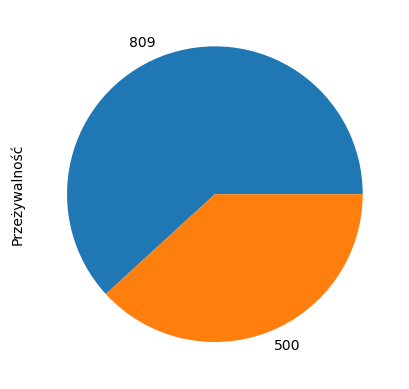

In [675]:
# Iformacje o przeżywalności pasażerów
liczbaPasazerow = df3["name"].count()
przezywalnoscOgolem = (df3["survived"] == 1).sum()
print(f"Katastrofę przeżyło: {przezywalnoscOgolem}, co stanowi {(round((przezywalnoscOgolem / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
pie_przezywalnosc_df3 = df3['survived'].value_counts().to_frame('Przeżywalność')
pie_przezywalnosc_df3.plot(kind="pie", y="Przeżywalność", labels=pie_przezywalnosc_df3["Przeżywalność"], legend=False)

Liczba kobiet: 466, co stanowi 36.0 % ogółu pasażerów
Liczba mężczyzn: 843, co stanowi 64.0 % ogółu pasażerów


<Axes: ylabel='Płeć'>

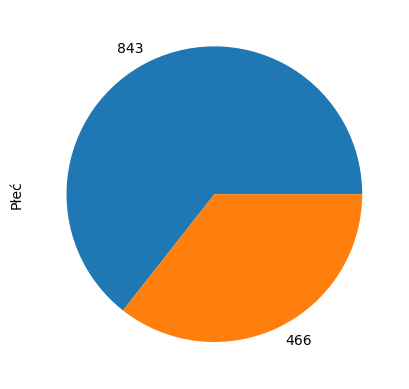

In [676]:
# Informacje o liczbie i % udziale płci w ogólnej liczbie pasażerów
liczbaPasazerow = df3["name"].count()
liczbaKobiet = (df3["sex"] == 0).sum()
liczbaMezczyzn = (df3["sex"] == 1).sum()
print(f"Liczba kobiet: {liczbaKobiet}, co stanowi {(round((liczbaKobiet / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
print(f"Liczba mężczyzn: {liczbaMezczyzn}, co stanowi {(round((liczbaMezczyzn / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
pie_plec_df3 = df3['sex'].value_counts().to_frame('Płeć')
pie_plec_df3.plot(kind="pie", y="Płeć", labels=pie_plec_df3["Płeć"], legend=False)

Liczba uratowanych kobiet: 339
 - co stanowi 26.0 % ogółu uratowanych pasażerów
 - co stanowi 73.0 % ogółu kobiet
Liczba uratowanych mężczyzn: 161
 - co stanowi 12.0 % ogółu uratowanych pasażerów
 - co stanowi 19.0 % ogółu mężczyzn


<Axes: ylabel='Przeżywalność wg płci'>

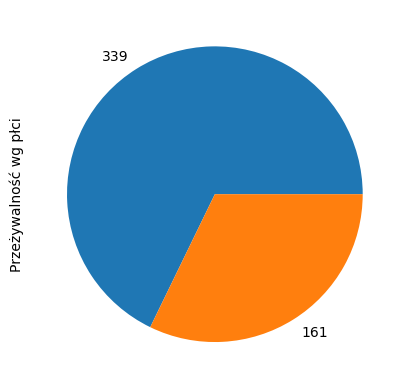

In [817]:
# Informacje o liczbie i % udziale płci w ogólnej liczbie pasażerów, którzy przeżyli katastrofę
liczbaUratowanychPasazerow = df3["survived"].count()
liczbaUratowanychKobiet = ((df3["sex"] == 0) & (df3["survived"] == 1)).sum()
liczbaUratowanychMezczyzn = ((df3["sex"] == 1) & (df3["survived"] == 1)).sum()
print(f"Liczba uratowanych kobiet: {liczbaUratowanychKobiet}\n - co stanowi {(round((liczbaUratowanychKobiet / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((liczbaUratowanychKobiet / liczbaKobiet), 2)) * 100} % ogółu kobiet")
print(f"Liczba uratowanych mężczyzn: {liczbaUratowanychMezczyzn}\n - co stanowi {(round((liczbaUratowanychMezczyzn / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((liczbaUratowanychMezczyzn / liczbaMezczyzn), 2)) * 100} % ogółu mężczyzn")
pie_survived_df3 = df3[(df3["survived"] == 1)]
pie_plec_df3 = pie_survived_df3['sex'].value_counts().to_frame('Przeżywalność wg płci')
pie_plec_df3.plot(kind="pie", y="Przeżywalność wg płci", labels=pie_plec_df3["Przeżywalność wg płci"], legend=False)

In [837]:
# Informacje o liczbie i % udziale osób do lat 15 włącznie oraz osób powyżej 65 roku życia
liczbaPasazerow = df3["name"].count()
liczbaDzieci = (df3["age"] <= 15).sum()
liczbaStarców = (df3["age"] > 65).sum()
print(f"Liczba dzieci: {liczbaDzieci}, co stanowi {(round((liczbaDzieci / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
print(f"Liczba starców: {liczbaStarców}, co stanowi {(round((liczbaStarców / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")

Liczba dzieci: 115, co stanowi 9.0 % ogółu pasażerów
Liczba starców: 10, co stanowi 1.0 % ogółu pasażerów


In [840]:
# Informacje o liczbie i % udziale osób do lat 15 włącznie oraz osób powyżej 65 roku życia w ogólnej liczbie psażerów, którzy przeżyli katastrofę
liczbaUratowanychPasazerow = df3["survived"].count()
liczbaUratowanychDzieci = ((df3["age"] <= 15) & (df3["survived"] == 1)).sum()
liczbaUratowanychStarcow = ((df3["age"] > 65) & (df3["survived"] == 1)).sum()
print(f"Liczba uratowanych dzieci: {liczbaUratowanychDzieci}\n - co stanowi {(round((liczbaUratowanychDzieci / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((liczbaUratowanychDzieci / liczbaDzieci), 2)) * 100} % ogółu dzieci")
print(f"Liczba uratowanych starców: {liczbaUratowanychStarcow}\n - co stanowi {(round((liczbaUratowanychStarcow / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((liczbaUratowanychStarcow / liczbaStarców), 2)) * 100} % ogółu starców")

Liczba uratowanych dzieci: 66
 - co stanowi 5.0 % ogółu uratowanych pasażerów
 - co stanowi 56.99999999999999 % ogółu dzieci
Liczba uratowanych starców: 2
 - co stanowi 0.0 % ogółu uratowanych pasażerów
 - co stanowi 20.0 % ogółu starców


Liczba osób nie posiadających na pokładzie rodzeństwo lub małżonka: 891, co stanowi 68.0 % ogółu pasażerów


<Axes: ylabel='Bez rodzeństwa lub małżonka'>

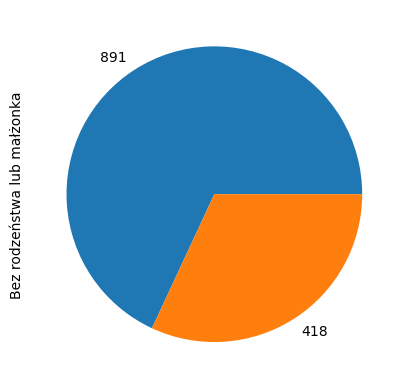

In [798]:
# Informacje o liczbie i % udziale osób nie posiadających na pokładzie rodzeństwo lub małżonka w ogólnej liczbie pasażerów
liczbaPasazerow = df3["name"].count()
liczbaBezMalzonka = (df3["sibsp"] == 0).sum()
print(f"Liczba osób nie posiadających na pokładzie rodzeństwo lub małżonka: {liczbaBezMalzonka}, co stanowi {(round((liczbaBezMalzonka / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
pie_bez_malzonka_df3 = (df3["sibsp"] == 0).value_counts().to_frame('Bez rodzeństwa lub małżonka')
pie_bez_malzonka_df3.plot(kind="pie", y="Bez rodzeństwa lub małżonka", labels=pie_bez_malzonka_df3["Bez rodzeństwa lub małżonka"], legend=False)

Liczba osób uratowanych, nie posiadających na pokładzie rodzeństwa lub małżonka: 309
 - co stanowi 24.0 % ogółu uratowanych pasażerów
 - co stanowi 35.0 % ogółu pasażerów nie posiadających na pokładzie rodzeństwa lub małżonka


<Axes: ylabel='Uratowani bez rodzeństwa lub małżonka'>

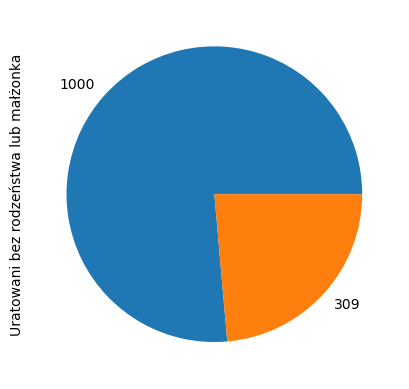

In [841]:
# Informacje o liczbie i % udziale osób nie posiadających na pokładzie rodzeństwo lub małżonka w ogólnej liczbie pasażerów, którzy przeżyli katastrofę
liczbaUratowanychPasazerow = df3["survived"].count()
liczbaUratowanychBezMalzonka = ((df3["sibsp"] == 0) & (df3["survived"] == 1)).sum()
print(f"Liczba osób uratowanych, nie posiadających na pokładzie rodzeństwa lub małżonka: {liczbaUratowanychBezMalzonka}\n - co stanowi {(round((liczbaUratowanychBezMalzonka / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((liczbaUratowanychBezMalzonka / liczbaBezMalzonka), 2)) * 100} % ogółu pasażerów nie posiadających na pokładzie rodzeństwa lub małżonka")
pie_uratowani_bez_malzonka_df3 = ((df3["sibsp"] == 0) & (df3["survived"] == 1)).value_counts().to_frame('Uratowani bez rodzeństwa lub małżonka')
pie_uratowani_bez_malzonka_df3.plot(kind="pie", y="Uratowani bez rodzeństwa lub małżonka", labels=pie_uratowani_bez_malzonka_df3["Uratowani bez rodzeństwa lub małżonka"], legend=False)

Liczba osób nie posiadających na pokładzie rodziców lub dzieci: 1002, co stanowi 77.0 % ogółu pasażerów


<Axes: ylabel='Bez rodziców lub dzieci'>

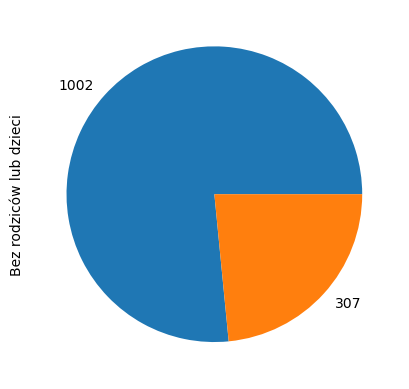

In [801]:
# Informacje o liczbie i % udziale osób nie posiadających na pokładzie rodziców lub dzieci w ogólnej liczbie pasażerów
liczbaPasazerow = df3["name"].count()
liczbaBezRodzicow = (df3["parch"] == 0).sum()
print(f"Liczba osób nie posiadających na pokładzie rodziców lub dzieci: {liczbaBezRodzicow}, co stanowi {(round((liczbaBezRodzicow / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
pie_bez_rodzicow_df3 = (df3["parch"] == 0).value_counts().to_frame('Bez rodziców lub dzieci')
pie_bez_rodzicow_df3.plot(kind="pie", y="Bez rodziców lub dzieci", labels=pie_bez_rodzicow_df3["Bez rodziców lub dzieci"], legend=False)

Liczba osób uratowanych, nie posiadających na pokładzie rodziców lub dzieci: 336
 - co stanowi 26.0 % ogółu uratowanych pasażerów
 - co stanowi 34.0 % ogółu pasażerów nie posiadających na pokładzie rodziców lub dzieci


<Axes: ylabel='Uratowanych bez rodziców lub dzieci'>

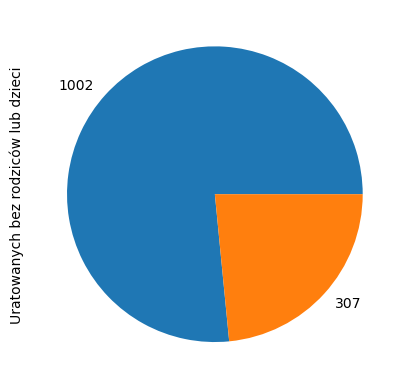

In [842]:
# Informacje o liczbie i % udziale osób nie posiadających na pokładzie rodziców lub dzieci w ogólnej liczbie pasażerów, którzy przeżyli katastrofę
liczbaUratowanychPasazerow = df3["survived"].count()
liczbaUratowanychBezRodzicow = ((df3["parch"] == 0) & (df3["survived"] == 1)).sum()
print(f"Liczba osób uratowanych, nie posiadających na pokładzie rodziców lub dzieci: {liczbaUratowanychBezRodzicow}\n - co stanowi {(round((liczbaUratowanychBezRodzicow / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((liczbaUratowanychBezRodzicow / liczbaBezRodzicow), 2)) * 100} % ogółu pasażerów nie posiadających na pokładzie rodziców lub dzieci")
pie_uratowanych_bez_rodzicow_df3 = (df3["parch"] == 0).value_counts().to_frame('Uratowanych bez rodziców lub dzieci')
pie_uratowanych_bez_rodzicow_df3.plot(kind="pie", y="Uratowanych bez rodziców lub dzieci", labels=pie_uratowanych_bez_rodzicow_df3["Uratowanych bez rodziców lub dzieci"], legend=False)

Liczba osób nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci: 790, co stanowi 60.0 % ogółu pasażerów


<Axes: ylabel='Samotni'>

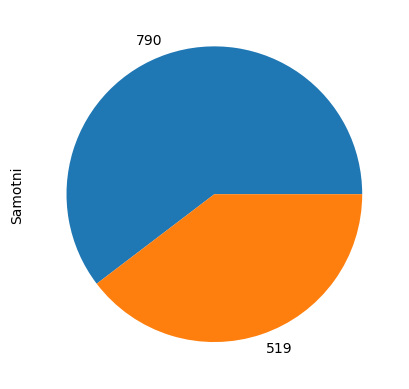

In [804]:
# Informacje o liczbie i % udziale osób nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci w ogólnej liczbie pasażerów
liczbaPasazerow = df3["name"].count()
liczbaSamotnych = ((df3["sibsp"] == 0) & (df3["parch"] == 0)).sum()
print(f"Liczba osób nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci: {liczbaSamotnych}, co stanowi {(round((liczbaSamotnych / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
pie_samotni_df3 = ((df3["sibsp"] == 0) & (df3["parch"] == 0)).value_counts().to_frame('Samotni')
pie_samotni_df3.plot(kind="pie", y="Samotni", labels=pie_samotni_df3["Samotni"], legend=False)

Liczba osób uratowanych, nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci: 239
 - co stanowi 18.0 % ogółu uratowanych pasażerów
 - co stanowi 30.0 % ogółu pasażerów nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci


<Axes: ylabel='Uratowanych samotnych'>

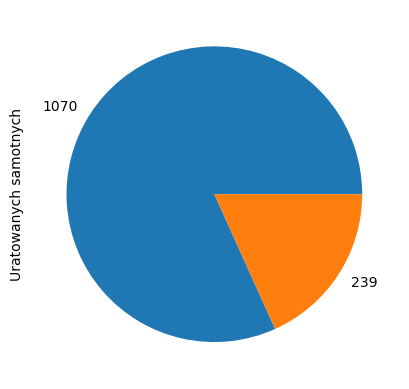

In [843]:
# Informacje o liczbie i % udziale osób nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci w ogólnej liczbie pasażerów, którzy przeżyli katastrofę
liczbaUratowanychPasazerow = df3["survived"].count()
liczbaUratowanychSamotnych = ((df3["sibsp"] == 0) & (df3["parch"] == 0) & (df3["survived"] == 1)).sum()
print(f"Liczba osób uratowanych, nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci: {liczbaUratowanychSamotnych}\n - co stanowi {(round((liczbaUratowanychSamotnych / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((liczbaUratowanychSamotnych / liczbaSamotnych), 2)) * 100} % ogółu pasażerów nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci")
pie_uratowanych_samotnych_df3 = ((df3["sibsp"] == 0) & (df3["parch"] == 0) & (df3["survived"] == 1)).value_counts().to_frame('Uratowanych samotnych')
pie_uratowanych_samotnych_df3.plot(kind="pie", y="Uratowanych samotnych", labels=pie_uratowanych_samotnych_df3["Uratowanych samotnych"], legend=False)

Liczba pasażerów posiadających bilet 1 klasy: 323, co stanowi 25.0 % ogółu pasażerów
Liczba pasażerów posiadających bilet 2 klasy: 277, co stanowi 21.0 % ogółu pasażerów
Liczba pasażerów posiadających bilet 3 klasy: 709, co stanowi 54.0 % ogółu pasażerów


<Axes: ylabel='Liczba pasażerów wg klasy'>

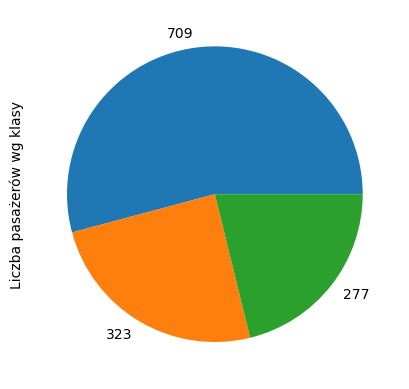

In [810]:
# Informacje o liczbie i % udziale pasażerów w podziale na klasę biletu w ogólnej liczbie pasażerów
liczbaPasazerow = df3["name"].count()
klasa1 = (df3["pclass"] == 1).sum()
klasa2 = (df3["pclass"] == 2).sum()
klasa3 = (df3["pclass"] == 3).sum()
print(f"Liczba pasażerów posiadających bilet 1 klasy: {klasa1}, co stanowi {(round((klasa1 / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
print(f"Liczba pasażerów posiadających bilet 2 klasy: {klasa2}, co stanowi {(round((klasa2 / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
print(f"Liczba pasażerów posiadających bilet 3 klasy: {klasa3}, co stanowi {(round((klasa3 / liczbaPasazerow), 2)) * 100} % ogółu pasażerów")
pie_klasa_df3 = df3['pclass'].value_counts().to_frame('Liczba pasażerów wg klasy')
pie_klasa_df3.plot(kind="pie", y="Liczba pasażerów wg klasy", labels=pie_klasa_df3["Liczba pasażerów wg klasy"], legend=False)

Liczba uratowanych pasażerów posiadających bilet 1 klasy: 200
 - co stanowi 15.0 % ogółu uratowanych pasażerów
 - co stanowi 62.0 % ogółu pasażerów posiadających bilet 1 klasy
Liczba uratowanych pasażerów posiadających bilet 2 klasy: 119
 - co stanowi 9.0 % ogółu uratowanych pasażerów
 - co stanowi 43.0 % ogółu pasażerów posiadających bilet 2 klasy
Liczba uratowanych pasażerów posiadających bilet 3 klasy: 181
 - co stanowi 14.000000000000002 % ogółu uratowanych pasażerów
 - co stanowi 26.0 % ogółu pasażerów posiadających bilet 3 klasy


<Axes: ylabel='Liczba uratowanych pasażerów wg klasy'>

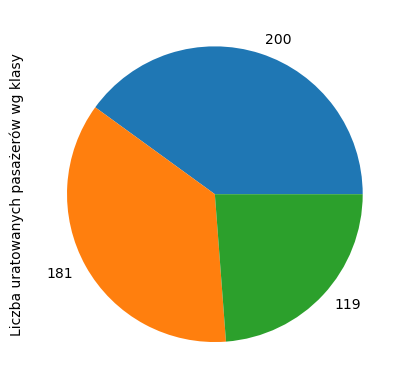

In [844]:
# Informacje o liczbie i % udziale pasażerów w podziale na klasę biletu w ogólnej liczbie pasażerów, którzy przeżyli katastrofę
liczbaUratowanychPasazerow = df3["survived"].count()
uratowaniPasazerowie_df3 = df3[df3["survived"] == 1]
uratowaniKlasa1 = (uratowaniPasazerowie_df3["pclass"] == 1).sum()
uratowaniKlasa2 = (uratowaniPasazerowie_df3["pclass"] == 2).sum()
uratowaniKlasa3 = (uratowaniPasazerowie_df3["pclass"] == 3).sum()
print(f"Liczba uratowanych pasażerów posiadających bilet 1 klasy: {uratowaniKlasa1}\n - co stanowi {(round((uratowaniKlasa1 / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((uratowaniKlasa1 / klasa1), 2)) * 100} % ogółu pasażerów posiadających bilet 1 klasy")
print(f"Liczba uratowanych pasażerów posiadających bilet 2 klasy: {uratowaniKlasa2}\n - co stanowi {(round((uratowaniKlasa2 / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((uratowaniKlasa2 / klasa2), 2)) * 100} % ogółu pasażerów posiadających bilet 2 klasy")
print(f"Liczba uratowanych pasażerów posiadających bilet 3 klasy: {uratowaniKlasa3}\n - co stanowi {(round((uratowaniKlasa3 / liczbaUratowanychPasazerow), 2)) * 100} % ogółu uratowanych pasażerów")
print(f" - co stanowi {(round((uratowaniKlasa3 / klasa3), 2)) * 100} % ogółu pasażerów posiadających bilet 3 klasy")
pie_uratowani_klasa_df3 = uratowaniPasazerowie_df3['pclass'].value_counts().to_frame('Liczba uratowanych pasażerów wg klasy')
pie_uratowani_klasa_df3.plot(kind="pie", y="Liczba uratowanych pasażerów wg klasy", labels=pie_uratowani_klasa_df3["Liczba uratowanych pasażerów wg klasy"], legend=False)

In [856]:
# Informacje o średniej cenie biletu w podziale na klasę biletu
sredniaCenaBiletu = df3["fare"].mean()
Klasa1_df3 = df3[(df3["pclass"] == 1)]
Klasa2_df3 = df3[(df3["pclass"] == 2)]
Klasa3_df3 = df3[(df3["pclass"] == 3)]
sredniaCenaBiletuKlasa1 = Klasa1_df3["fare"].mean()
sredniaCenaBiletuKlasa2 = Klasa2_df3["fare"].mean()
sredniaCenaBiletuKlasa3 = Klasa3_df3["fare"].mean()
print(f"Średnia cena biletu 1 klasy: {round(sredniaCenaBiletuKlasa1, 2)}, co stanowi {round((sredniaCenaBiletuKlasa1 / sredniaCenaBiletu), 2) * 100} % średniej wszystkich biletów")
print(f"Średnia cena biletu 2 klasy: {round(sredniaCenaBiletuKlasa2, 2)}, co stanowi {round((sredniaCenaBiletuKlasa2 / sredniaCenaBiletu), 2) * 100} % średniej wszystkich biletów")
print(f"Średnia cena biletu 3 klasy: {round(sredniaCenaBiletuKlasa3, 2)}, co stanowi {round((sredniaCenaBiletuKlasa3 / sredniaCenaBiletu), 2) * 100} % średniej wszystkich biletów")

Średnia cena biletu 1 klasy: 87.51, co stanowi 263.0 % średniej wszystkich biletów
Średnia cena biletu 2 klasy: 21.18, co stanowi 64.0 % średniej wszystkich biletów
Średnia cena biletu 3 klasy: 13.3, co stanowi 40.0 % średniej wszystkich biletów


**Wnioski**
- 'survived' - katastrofę przeżyło 500 osób, co stanowi 38.0 % ogółu pasażerów.
- 'sex'
    - Liczba kobiet: 466, co stanowi 36.0 % ogółu pasażerów
    - Liczba uratowanych kobiet: 339
        - co stanowi 26.0 % ogółu uratowanych pasażerów
        - co stanowi 73.0 % ogółu kobiet
    - Liczba mężczyzn: 843, co stanowi 64.0 % ogółu pasażerów
    - Liczba uratowanych mężczyzn: 161
        - co stanowi 12.0 % ogółu uratowanych pasażerów
        - co stanowi 19.0 % ogółu mężczyzn
- 'age'
    - Liczba dzieci: 115, co stanowi 9.0 % ogółu pasażerów
    - Liczba uratowanych dzieci: 66
        - co stanowi 5.0 % ogółu uratowanych pasażerów
        - co stanowi 56.99999999999999 % ogółu dzieci
    - Liczba starców: 10, co stanowi 1.0 % ogółu pasażerów
    - Liczba uratowanych starców: 2
        - co stanowi 0.0 % ogółu uratowanych pasażerów
        - co stanowi 20.0 % ogółu starców
- 'sibsp'
    - Liczba osób nie posiadających na pokładzie rodzeństwo lub małżonka: 891, co stanowi 68.0 % ogółu pasażerów
    - Liczba osób uratowanych, nie posiadających na pokładzie rodzeństwa lub małżonka: 309
        - co stanowi 24.0 % ogółu uratowanych pasażerów
        - co stanowi 35.0 % ogółu pasażerów nie posiadających na pokładzie rodzeństwa lub małżonka
- 'parch'
    - Liczba osób nie posiadających na pokładzie rodziców lub dzieci: 1002, co stanowi 77.0 % ogółu pasażerów
    - Liczba osób uratowanych, nie posiadających na pokładzie rodziców lub dzieci: 336
        - co stanowi 26.0 % ogółu uratowanych pasażerów
        - co stanowi 34.0 % ogółu pasażerów nie posiadających na pokładzie rodziców lub dzieci
- 'sibsp' 'parch'
    - Liczba osób nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci: 790, co stanowi 60.0 % ogółu pasażerów
    - Liczba osób uratowanych, nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci: 239
        - co stanowi 18.0 % ogółu uratowanych pasażerów
        - co stanowi 30.0 % ogółu pasażerów nie posiadających na pokładzie rodzeństwa, małżonka, rodziców lub dzieci
- 'pclass'
    - Liczba pasażerów posiadających bilet 1 klasy: 323, co stanowi 25.0 % ogółu pasażerów
    - Liczba uratowanych pasażerów posiadających bilet 1 klasy: 200
        - co stanowi 15.0 % ogółu uratowanych pasażerów
        - co stanowi 62.0 % ogółu pasażerów posiadających bilet 1 klasy
    - Liczba pasażerów posiadających bilet 2 klasy: 277, co stanowi 21.0 % ogółu pasażerów
    - Liczba uratowanych pasażerów posiadających bilet 2 klasy: 119
        - co stanowi 9.0 % ogółu uratowanych pasażerów
        - co stanowi 43.0 % ogółu pasażerów posiadających bilet 2 klasy
    - Liczba pasażerów posiadających bilet 3 klasy: 709, co stanowi 54.0 % ogółu pasażerów
    - Liczba uratowanych pasażerów posiadających bilet 3 klasy: 181
        - co stanowi 14.000000000000002 % ogółu uratowanych pasażerów
        - co stanowi 26.0 % ogółu pasażerów posiadających bilet 3 klasy
- 'fare'
    - Średnia cena biletu 1 klasy: 87.51, co stanowi 263.0 % średniej wszystkich biletów
    - Średnia cena biletu 2 klasy: 21.18, co stanowi 64.0 % średniej wszystkich biletów
    - Średnia cena biletu 3 klasy: 13.3, co stanowi 40.0 % średniej wszystkich biletów

## **3.2. Macierz korelacji**

### **3.2.1. Analiza związków między zmiennymi numerycznymi**

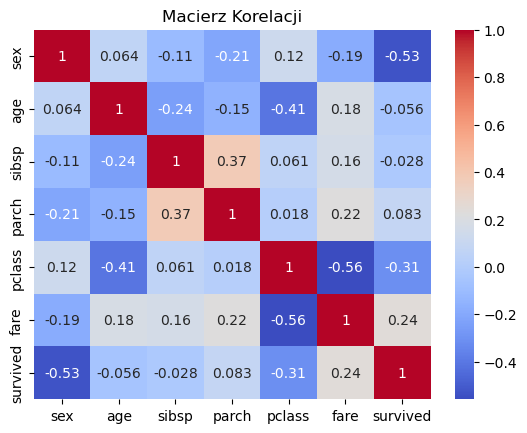

In [732]:
# Informacje o korelacji między zmiennymi numerycznymi
corrMatrix_df3 = df3[["sex", "age", "sibsp", "parch", "pclass", "fare", "survived"]].corr()
sns.heatmap(corrMatrix_df3, annot=True, cmap='coolwarm')
plt.title('Macierz Korelacji')
plt.show()

**Wnioski**
- 'sex'
  - Silna korelacja ujemna między 'sex' a 'survived'. Oznacza to, że kobiety miały większe szanse na przeżycie niż mężczyźni.
  - Słaba korelacja ujemna między 'sex' a 'parch'. Oznacza to, że kobiety relatywnie częściej podróżowały z rodzicami lub dziećmi niż mężczyźni.
- 'age'
  - Brak istotnej korelacji między 'age' a 'survived'. Oznacza to, że wiek nie był znaczącym czynnikiem wpływającym na przeżycie.
  - Silna korelacja ujemna między 'age' a 'pclass'. Oznacza to, że wiek był znaczącym czynnikiem charakteryzującym posiadacza biletu klasy 1.
  - Słaba korelacja ujemna między 'age' a 'sibsp'. Oznacza to, że rodzeństwo lub małżonków posiadali pasażerowie relatywnie młodzi.
- 'sibsp'
  - Brak istotnej korelacji między 'sibsp' a 'survived'. Oznacza to, że posiadanie na pokładzie rodzeństwa lub małżonka nie był znaczącym czynnikiem wpływającym na przeżycie.
  - Słaba korelacja dodatnia między 'sibsp' a 'parch'. Oznacza to, że posiadanie na pokładzie rodzeństwa lub małżonka było relatywnie częściej związane z posiadaniem również rodziców i dzieci.
- 'parch'
  - Brak istotnej korelacji między 'parch' a 'survived'. Oznacza to, że posiadanie na pokładzie rodziców lub dzieci nie był znaczącym czynnikiem wpływającym na przeżycie.
  - Słaba korelacja między 'parch' a 'fare'. Oznacza to, że wyższa cena biletu była dla osób posiadających rodziców lub dzieci na pokładzie. Wynika z tego fakt, iż cena biletu zbiorczego mogła być przypisana do jednej osoby. 
- 'pclass'
  - Silna, ujemna korelacja między 'pclass' a 'survived'. Oznacza to, że im wyższa klasa pasażera (1 - klasa pierwsza), tym większa była szansa na przeżycie.
  - Silna, ujemna korelacja między 'pclass' a 'fare'. Oznacza to, że im wyższa klasa pasażera (1 - klasa pierwsza), tym była wyższa cena biletu.
- 'fare'
  - Słaba, dodatnia korelacja między 'fare' a "survived'. Oznacza to, że im wyższa była cena biletu, tym nieco większa była szansa na przeżycie.

### **3.2.2. Wskazanie potencjalnych zależności liniowych**

**Wnioski**
Wg analizy związków między zmiennymi numerycznmi wynika, że zachodzą silne zależności liniowe w następujących obszarach:
- płci pasażera w relacji do przeżywalności katastrofy
- *wieku pasażera w relacji do klasy biletu, który posiadał*
- klasy biletu pasażera a jego przeżywalnością katastrofy
- klasy biletu pasażera a jego ceną

*Uwaga: z racji na fakt, iż w zmiennej 'age' występuje ponad 10% braków w danych, wnioski opierające się na tej zmiennej mogą być obarczone dużym marginesem błędu.*

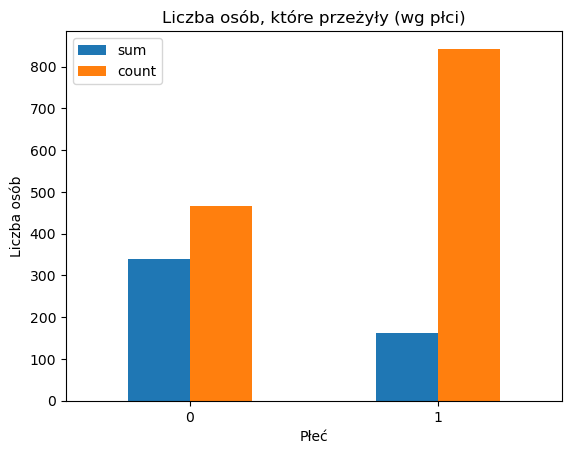

Przeżyło 339 z 466, co stanowiło 72.7% ogółu kobiet
Przeżyło 161 z 843, co stanowiło 19.1% ogółu mężczyzn


In [659]:
# Zależność między zmienną 'sex' a 'survived' w podziale na 'kobiety' i 'mężczyżni'
przezywalnoscWgPlci_df3 = df3[["sex", "survived"]]
grouped = df3.groupby('sex')['survived'].agg(['sum', 'count'])
grouped.plot(kind='bar')
plt.title('Liczba osób, które przeżyły (wg płci)')
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.xticks(rotation=0) 
plt.show()

liczbaKobiet = (df3["sex"] == 0).sum()
przezywalnoscKobiet = ((df3["sex"] == 0) & (df3["survived"] == 1)).sum()
print(f"Przeżyło {przezywalnoscKobiet} z {liczbaKobiet}, co stanowiło {round((przezywalnoscKobiet / liczbaKobiet) * 100, 1)}% ogółu kobiet")
liczbaMezczyzn = (df3["sex"] == 1).sum()
przezywalnoscMezczyzn = ((df3["sex"] == 1) & (df3["survived"] == 1)).sum()
print(f"Przeżyło {przezywalnoscMezczyzn} z {liczbaMezczyzn}, co stanowiło {round((przezywalnoscMezczyzn / liczbaMezczyzn) * 100, 1)}% ogółu mężczyzn")

**Wnioski dla zależności między płcią a przeżyciem**
- zginęło 127 kobiet i 682 mężczyzn, co mimo dysproporcji udziału kobiet i mężczyzn w ogólnej liczbie basażerów wskazuje na heroizm i altruizm mężczyzn

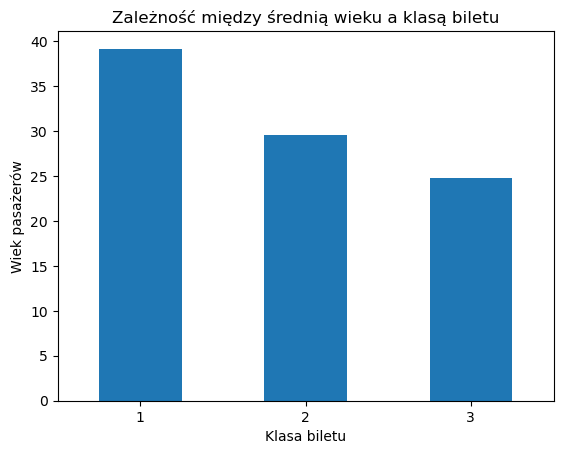

Średnia wieku pasażerów klasy 1, to 39.2 lat
Średnia wieku pasażerów klasy 2, to 29.5 lat
Średnia wieku pasażerów klasy 3, to 24.8 lat


In [674]:
# Zależność między średnią zmiennej 'age' a zmienną 'pclass' w podziale na 3 klasy biletu
klasaWgWieku_df3 = df3[["pclass", "age"]]
grouped = df3.groupby('pclass')['age'].agg('mean')
grouped.plot(kind='bar')
plt.title('Zależność między średnią wieku a klasą biletu')
plt.xlabel('Klasa biletu')
plt.ylabel('Wiek pasażerów')
plt.xticks(rotation=0) 
plt.show()

pasazerowieKlasy1_df3 = df3[(df3["pclass"] == 1)]
sredniaWiekuKlasy1 = round(pasazerowieKlasy1_df3["age"].mean(), 1)
pasazerowieKlasy2_df3 = df3[(df3["pclass"] == 2)]
sredniaWiekuKlasy2 = round(pasazerowieKlasy2_df3["age"].mean(), 1)
pasazerowieKlasy3_df3 = df3[(df3["pclass"] == 3)]
sredniaWiekuKlasy3 = round(pasazerowieKlasy3_df3["age"].mean(), 1)
print(f"Średnia wieku pasażerów klasy 1, to {sredniaWiekuKlasy1} lat")
print(f"Średnia wieku pasażerów klasy 2, to {sredniaWiekuKlasy2} lat")
print(f"Średnia wieku pasażerów klasy 3, to {sredniaWiekuKlasy3} lat")

**Wnioski zależności między średnią wieku a klasą biletu**
- duża dysproporcja średniej wieku w stosunku do klasy biletu wskazuje, że w tym konkretnym przypadku zamożność przychodzi z wiekiem

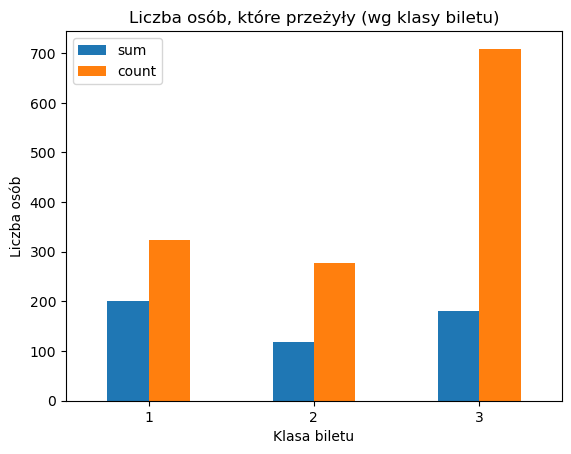

Przezyło 200 z 323, co stanowi 61.9 % ogółu pasażerów klasy 1
Przezyło 119 z 277, co stanowi 43.0 % ogółu pasażerów klasy 2
Przezyło 181 z 709, co stanowi 25.5 % ogółu pasażerów klasy 3


In [672]:
# Zależność między zmienną 'pclass' a 'survived' w podziale na 3 klasy biletu
przezywalnoscWgKlasy_df3 = df3[["pclass", "survived"]]
grouped = df3.groupby('pclass')['survived'].agg(['sum', 'count'])
grouped.plot(kind='bar')
plt.title('Liczba osób, które przeżyły (wg klasy biletu)')
plt.xlabel('Klasa biletu')
plt.ylabel('Liczba osób')
plt.xticks(rotation=0) 
plt.show()

przeżywalnosc_df3 = df3[(df3["survived"] == 1)]
pasazerowieKlasy1 = (df3["pclass"] == 1).sum()
przezywalnoscKlasy1 = (przeżywalnosc_df3["pclass"] == 1).sum()
pasazerowieKlasy2 = (df3["pclass"] == 2).sum()
przezywalnoscKlasy2 = (przeżywalnosc_df3["pclass"] == 2).sum()
pasazerowieKlasy3 = (df3["pclass"] == 3).sum()
przezywalnoscKlasy3 = (przeżywalnosc_df3["pclass"] == 3).sum()
print(f"Przezyło {przezywalnoscKlasy1} z {pasazerowieKlasy1}, co stanowi {round((przezywalnoscKlasy1 / pasazerowieKlasy1) * 100, 1)} % ogółu pasażerów klasy 1")
print(f"Przezyło {przezywalnoscKlasy2} z {pasazerowieKlasy2}, co stanowi {round((przezywalnoscKlasy2 / pasazerowieKlasy2) * 100, 1)} % ogółu pasażerów klasy 2")
print(f"Przezyło {przezywalnoscKlasy3} z {pasazerowieKlasy3}, co stanowi {round((przezywalnoscKlasy3 / pasazerowieKlasy3) * 100, 1)} % ogółu pasażerów klasy 3")

**Wnioski z zależności między klasą biletu a przeżyciem**
- zginęło 123 pasażerów klasy 1, 158 pasażerów klasy 2 i 528 klasy 3, co wskazuje, że największe szanse przeżycia mieli pasażerowie klasy 1 i względnie 2.

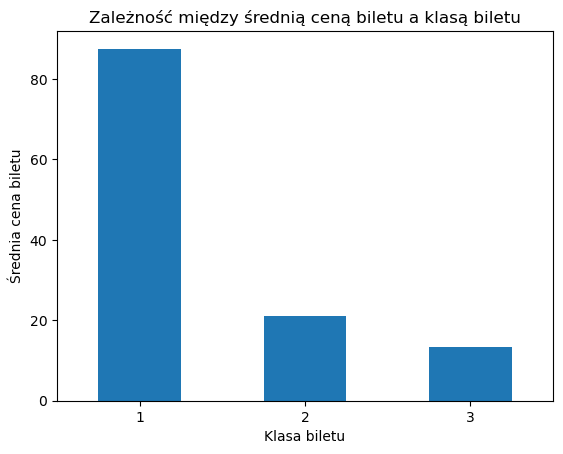

Średnia cena biletu klasy 1, to 87.5
Średnia cena biletu klasy 2, to 21.2
Średnia cena biletu klasy 3, to 13.3


In [673]:
# Zależność między zmienną ' pclass' a 'fare' w podziale na 3 klasy biletu
klasaWgCeny_df3 = df3[["pclass", "fare"]]
grouped = df3.groupby('pclass')['fare'].agg('mean')
grouped.plot(kind='bar')
plt.title('Zależność między średnią ceną a klasą biletu')
plt.xlabel('Klasa biletu')
plt.ylabel('Średnia cena biletu')
plt.xticks(rotation=0) 
plt.show()

pasazerowieKlasy1_df3 = df3[(df3["pclass"] == 1)]
sredniaCenyBiletuKlasy1 = round(pasazerowieKlasy1_df3["fare"].mean(), 1)
pasazerowieKlasy2_df3 = df3[(df3["pclass"] == 2)]
sredniaCenyBiletuKlasy2 = round(pasazerowieKlasy2_df3["fare"].mean(), 1)
pasazerowieKlasy3_df3 = df3[(df3["pclass"] == 3)]
sredniaCenyBiletuKlasy3 = round(pasazerowieKlasy3_df3["fare"].mean(), 1)

print(f"Średnia cena biletu klasy 1, to {sredniaCenyBiletuKlasy1}")
print(f"Średnia cena biletu klasy 2, to {sredniaCenyBiletuKlasy2}")
print(f"Średnia cena biletu klasy 3, to {sredniaCenyBiletuKlasy3}")

**Wnioski zależności między średnią ceną a klasą biletu**
- duża dysproporcja średniej ceny biletu w stosunku do klasy biletu sugeruje, że analogiczna dysproporcja występowała w standardzie podróżowania, w tym również w środkach bezpieczeństwa

# **4. Wizualizacja danych**

## **4.1. Wykorzystanie wykresów do odkrycia ukrytych wzorców**

### **4.1.1. Histogramy (analiza rozkładów)**

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

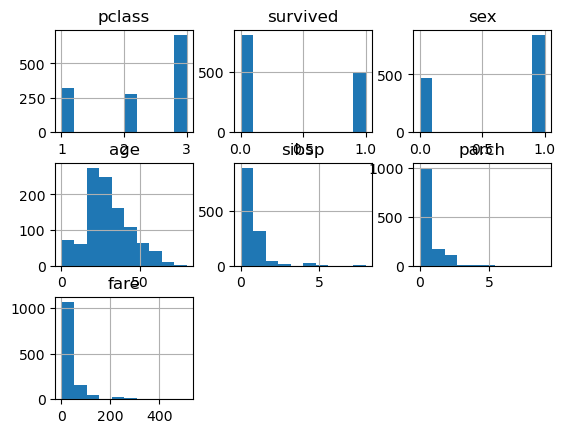

In [387]:
# Informacje o możliwych histogramach dla zmiennych
df3.hist()

<Axes: >

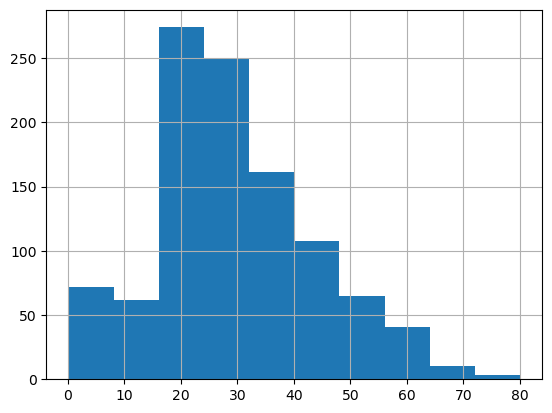

In [408]:
# Histogram zmiennej 'age'
df3["age"].hist(bins=10)

**Wnioski dla zmiennej 'age'**
- **kształt rozkładu:** Lekka asymetria prawoskrętna. Mediana (28) jest nieco większa niż średnia (29.88), co sugeruje, że rozkład wieku jest lekko przesunięty w kierunku wartości wyższych. Oznacza to, że jest więcej młodszych pasażerów niż starszych, ale rozkład nie jest mocno skośny.
- **wartości centralne:** Średni wiek pasażera wynosi 29.88 roku, co oznacza, że średnio na pokładzie byli ludzie w wieku około 30 lat. Mediana wynosi 28 lat, co oznacza, że połowa pasażerów miała mniej niż 28 lat. 
- **rozproszenie danych:**  Odchylenie standardowe wynosi 14.41, co wskazuje na dość duże zróżnicowanie wieku pasażerów. Wiek osób na pokładzie rozciągał się od niemowląt (0.17 roku) do osób w podeszłym wieku (80 lat). Różnica między pierwszym a trzecim kwartylem (rozstęp międzykwartylowy) wynosi 18 lat, co dodatkowo potwierdza, że wiek pasażerów był dość zróżnicowany.

**Interpretacja:** Wiek pasażerów był zróżnicowany, z lekką tendencją do młodszych osób. Rozkład wieku nie był idealnie symetryczny, ale również nie był mocno skośny. Potencjalnymi przyczynami może być fakt, iż na pokładzie były rodziny z dziećmi, co obniżało średnią wieku. Część pasażerów mogła być emigrantami (z reguły ludzie młodzi lub w średnim wieku) udającymi się do Stanów Zjednoczonych w poszukiwaniu lepszego życia. Na pokładzie byli również turyści (z reguły ludzie młodzi lub w średnim wieku), którzy podróżowali dla przyjemności.

<Axes: >

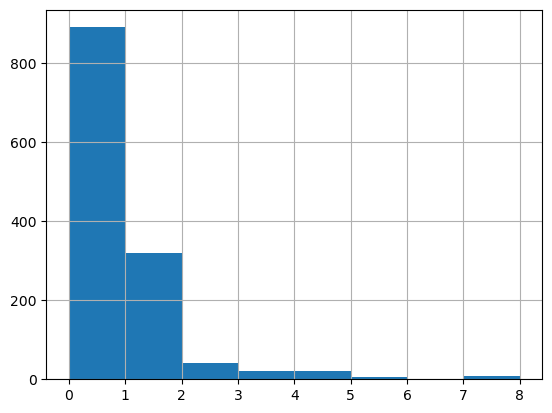

In [409]:
# Histogram zmiennej 'sibsp'
df3["sibsp"].hist(bins=8)

**Wnioski dla zmiennej 'sibsp'**
- **kształt rozkładu:** Silna asymetria prawoskrętna. Mediana (0) jest znacznie mniejsza niż średnia (0.49), co wskazuje na bardzo silną asymetrię prawoskrętna rozkładu. Oznacza to, że większość pasażerów podróżowała bez rodzeństwa lub małżonków, a niewielka grupa miała wielu towarzyszy podróży. 
- **wartości centralne:** Duża różnica między średnią a medianą potwierdza silną asymetrię rozkładu. Większość pasażerów podróżowała samotnie lub z niewielką liczbą bliskich, jednak występowały przypadki, gdzie na pokładzie było znacznie więcej członków rodziny.
- **rozproszenie danych:**  Odchylenie standardowe jest stosunkowo duże w porównaniu do średniej, co wskazuje na duże zróżnicowanie liczby rodzeństwa/małżonków wśród pasażerów.
Większość pasażerów (75%) podróżowała bez rodzeństwa lub małżonków (lub z maksymalnie jedną osobą), jednak występowały przypadki, gdzie na pokładzie było nawet 8 osób z jednej rodziny.

**Interpretacja:** Większość pasażerów podróżowała samotnie lub bez najbliższej rodziny. Istnieją jednak znaczące wyjątki. Niewielka część pasażerów podróżowała z dużą liczbą rodzeństwa lub małżonków.

<Axes: >

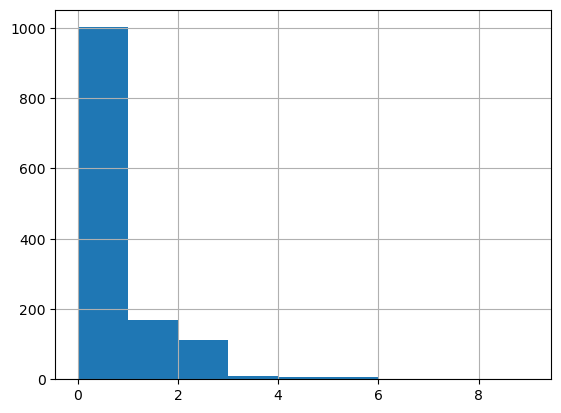

In [410]:
# Histogram zmiennej 'parch'
df3["parch"].hist(bins=9)

**Wnioski dla zmiennej 'parch'**
- **kształt rozkładu:** Silna asymetria prawoskrętna. Mediana i wszystkie kwartyle wynoszą 0, podczas gdy maksimum wynosi aż 9. To wskazuje na bardzo silną asymetrię prawoskrętna. Oznacza to, że większość pasażerów nie miała na pokładzie rodziców ani dzieci (0), a niewielka grupa miała znacznie więcej niż średnia. 
- **wartości centralne:** Średnia wartość wynosi 0.385, co sugeruje, że średnio na każdego pasażera przypadało mniej niż jedno dziecko lub rodzic. Jednakże, ze względu na silną asymetrię, mediana (0) jest bardziej reprezentatywna dla większości obserwacji. Mediana wynosi 0, co oznacza, że połowa pasażerów nie miała na pokładzie rodziców ani dzieci.
- **rozproszenie danych:**  Duże rozproszenie. Odchylenie standardowe wynosi 0.865, co wskazuje na duże rozproszenie danych. Mimo że większość pasażerów nie miała dzieci lub rodziców, istniała grupa osób, które podróżowały z większą liczbą członków rodziny. Maksimum na poziomie 9 sugeruje, że niektóre rodziny były bardzo liczne.

**Interpretacja:** Wartość maksymalna 9 może być uważana za wartość odstającą, która znacząco wpływa na obliczenia statystyczne, takie jak średnia i odchylenie standardowe. Potencjalnymi przyczynami takiej sytuacji może być fakt, iż wielu pasażerów trzeciej klasy mogło być emigrantami podróżującymi samotnie do nowego życia. Część pasażerów mogła podróżować służbowo lub turystycznie, a w niektórych przypadkach rodziny mogły podróżować oddzielnie.

<Axes: >

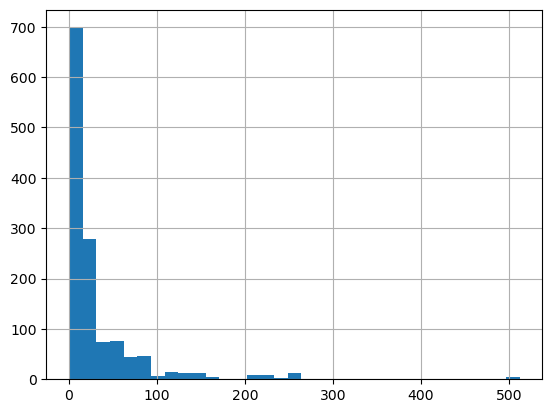

In [411]:
# Histogram zmiennej 'fare'
df3["fare"].hist(bins=33)

**Wnioski dla zmiennej 'fare'**
- **kształt rozkładu:** Silna asymetria prawoskrętna. Bardzo duża różnica między średnią a medianą, a także między trzecim kwartylem a medianą, wskazuje na silną asymetrię prawoskrętna rozkładu. Oznacza to, że większość wartości skupiona jest w lewej części rozkładu (niższe ceny biletów), a niewielka liczba bardzo wysokich cen znacznie "rozciąga" rozkład w prawo. Maksymalna wartość ceny biletu (512.3292) jest znacznie większa od pozostałych, co sugeruje, że może to być wartość odstająca (outlier).
- **wartości centralne:** Średnia cena biletu wynosi około 33.30. Jednak ze względu na silną asymetrię, średnia nie jest najlepszym wskaźnikiem centralnej tendencji w tym przypadku. Mediana wynosi 14.45, co oznacza, że połowa pasażerów zapłaciła mniej niż tę kwotę. Mediana jest bardziej reprezentatywna dla większości obserwacji ze względu na asymetrię rozkładu.
- **rozproszenie danych:**  Duże rozproszenie. Wysokie odchylenie standardowe (51.76) wskazuje na duże zróżnicowanie cen biletów. Długi ogon rozkładu. Obecność wartości odstających i silna asymetria prawoskrętna potwierdzają duże rozproszenie danych, szczególnie w górnej części rozkładu.

**Interpretacja:** Ceny biletów były bardzo zróżnicowane, od bardzo niskich po ekstremalnie wysokie. Większość pasażerów płaciła relatywnie niskie ceny, jednak istniała grupa osób, które zakupiły bardzo drogie bilety. Wysokie ceny biletów prawdopodobnie były związane z podróżowaniem w pierwszej klasie, co mogło mieć wpływ na szanse przeżycia.

### **4.1.2. Wykresy pudełkowe (identyfikacja odstających wartości)**

<Axes: >

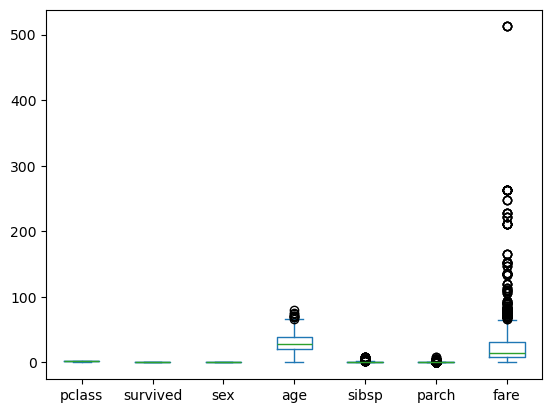

In [679]:
# Informacje o możliwych wykresach pudełkowych dla zmiennych
df3.plot(kind="box")

**Wnioski z przeglądu wykresów pudełkowych**
- Wartości odstające występują w zmiennych 'age', 'sibsp', 'parch' i 'fare'. Zatem tylko te zmienne będą przedmiotem dalszej analizy.

<Axes: >

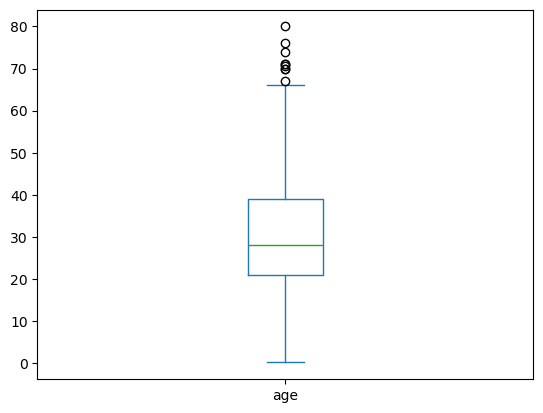

In [683]:
# Boxplot dla zmiennej 'age'
df3["age"].plot(kind="box")

**Wnioski dla zmiennej 'age'**
- **Mediana:** Wynosi około 28 lat. Oznacza to, że połowa badanej populacji ma mniej niż 28 lat.
- **Rozstęp międzykwartylowy (IQR):** Wynosi około 18 lat (39 - 21). Oznacza to, że środkowych 50% obserwacji mieści się w przedziale od 21 do 39 lat.
- **Wartości odstające:** Występują wartości odstające powyżej górnego wąsa, co sugeruje, że w badanej grupie są osoby znacznie starsze od większości.
- **Minimum i maksimum:** Najmłodsza osoba w badanej grupie ma około 0.17 roku (co może być błędem w danych lub np. noworodkiem), a najstarsza około 80 lat.

**Interpretacja** Wiek większości badanych osób koncentruje się wokół 28 lat. Istnieje grupa osób znacznie starszych od średniej, co sugeruje, że badana populacja jest niejednorodna pod względem wieku. Wartości minimalne mogą wymagać dodatkowej analizy, ponieważ wartość 0.17 roku wydaje się nierealistyczna w kontekście wieku człowieka.

<Axes: >

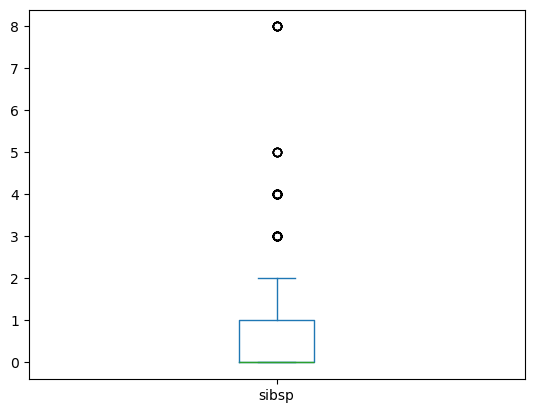

In [684]:
# Boxplot dla zmiennej 'sibsp'
df3["sibsp"].plot(kind="box")

**Wnioski dla zmiennej 'sibsp'**
- **Mediana:** Wynosi 0. Oznacza to, że większość pasażerów nie miała rodzeństwa ani małżonków na pokładzie.
- **Rozstęp międzykwartylowy (IQR):** Jest stosunkowo mały i wynosi 1 (1 - 0). Oznacza to, że środkowych 50% obserwacji ma wartość 0 lub 1.
- **Wartości odstające:** Występują wartości odstające powyżej górnego wąsa, co sugeruje, że niewielka grupa pasażerów miała znacznie więcej rodzeństwa lub małżonków na pokładzie niż pozostali.
- **Minimum i maksimum:** Minimalna liczba rodzeństwa/małżonków wynosi 0, a maksymalna 8.

**Interpretacja** Większość pasażerów podróżowała samotnie lub z co najwyżej jednym członkiem rodziny. Istnieje niewielka grupa pasażerów, która miała znacznie większą liczbę członków rodziny na pokładzie. Rozkład jest mocno prawostronny, co sugeruje, że większość rodzin podróżowała w małych grupach.

<Axes: >

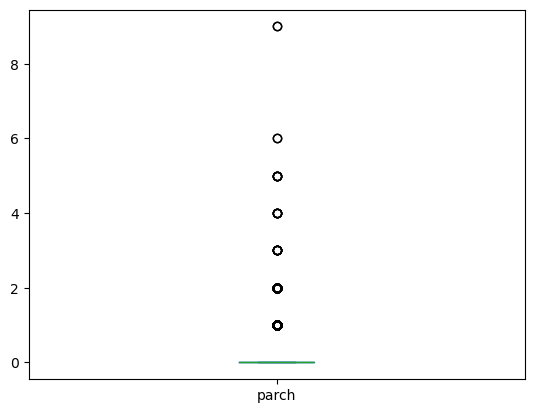

In [686]:
# Boxplot dla zmiennej 'parch'
df3["parch"].plot(kind="box")

**Wnioski dla zmiennej 'parch'**
- **Mediana:** Wynosi 0. Oznacza to, że większość pasażerów nie miała rodziców ani dzieci na pokładzie.
- **Rozstęp międzykwartylowy (IQR):** Jest bardzo mały i wynosi 0. Oznacza to, że 75% pasażerów nie miało rodziców ani dzieci na pokładzie.
- **Wartości odstające:** Na wykresie widzimy kilka wartości odstających powyżej górnego wąsa, co sugeruje, że niewielka grupa pasażerów miała znacznie więcej rodziców lub dzieci na pokładzie niż pozostali.
- **Minimum i maksimum:** Minimalna liczba rodziców/dzieci wynosi 0, a maksymalna 9.

**Interpretacja** Większość pasażerów podróżowała bez rodziców lub dzieci. Istnieje niewielka grupa pasażerów, która miała znacznie większą liczbę rodziców lub dzieci na pokładzie. Rozkład jest mocno prawostronny, co sugeruje, że większość pasażerów podróżowała samotnie lub w bardzo małych grupach rodzinnych.

<Axes: >

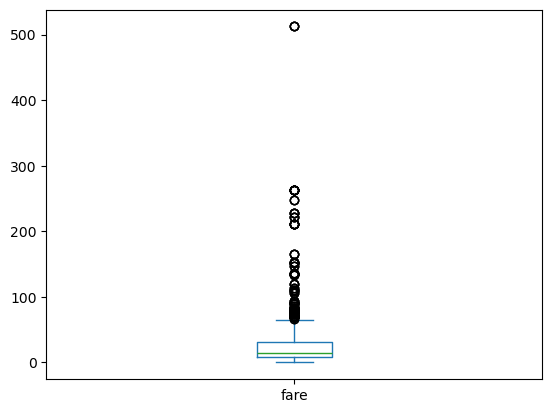

In [688]:
# Boxplot dla zmiennej 'fare'
df3["fare"].plot(kind="box")

**Wnioski dla zmiennej 'fare'**
- **Mediana:** Wynosi około 14.45. Oznacza to, że połowa pasażerów zapłaciła mniej niż 14.45, a połowa więcej.
- **Rozstęp międzykwartylowy (IQR):** Wynosi około 23.38 (31.27 - 7.89). Oznacza to, że środkowych 50% obserwacji mieści się w przedziale od 7.89 do 31.27.
- **Wartości odstające:** Na wykresie widzimy kilka wartości odstających powyżej górnego wąsa, co sugeruje, że niewielka grupa pasażerów zapłaciła znacznie więcej za bilet niż pozostali.
- **Minimum i maksimum:** Minimalna cena biletu wynosi 0, a maksymalna 512.33.

**Interpretacja** Większość pasażerów zapłaciła stosunkowo niską cenę za bilet. Istnieje niewielka grupa pasażerów, która zapłaciła znacznie wyższą cenę za bilet. Rozkład jest mocno prawostronny, co sugeruje, że ceny biletów były zróżnicowane, przy czym większość była na niższym poziomie.

### **4.1.3. Wykresy rozrzutu (analiza korelacji)**

Text(0, 0.5, 'Liczba posiadanego rodzeństwa lub współmażonka')

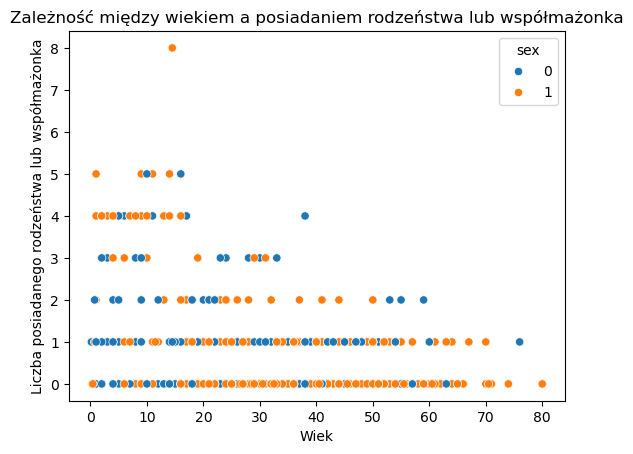

In [765]:
# Scatter dla zmiennych 'age' i 'sibsp'
sns.scatterplot(x='age', y='sibsp', data=df3, hue='sex')
plt.title('Zależność między wiekiem a posiadaniem rodzeństwa lub współmażonka')
plt.xlabel('Wiek')
plt.ylabel('Liczba posiadanego rodzeństwa lub współmażonka')

**Wnioski zależności między wiekiem ('age') a posiadaniem rodzeństwa lub małżonka na pokładzie ('sibsp')**
- Największa liczba bliskich kumuluje się w przedziale wiekowym poniżej 20 lat
- W przedziale wiekowym 40+ brak przypadków więcej niż 2 bliskich
- W przedziale wiekowym 60+ brak przypadków więcej niż 1 bliskiego
- Sporadyczne przypadki gdzie występuje więcej niż 5 bliskich
- Większość mężczyzn nie posiada bliskich

*Uwaga: Z racji na specyfikę danych (łączna wartość dla posiadanego rodzeństwa lub współmałżonka) interpretacja wartości dla liczby '1' może być myląca*

Text(0, 0.5, 'Liczba posiadanych rodziców lub dzieci')

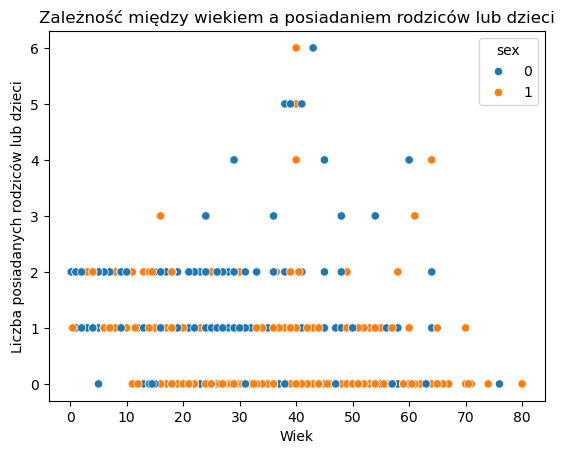

In [722]:
# Scatter dla zmiennych 'age' i 'parch'
sns.scatterplot(x='age', y='parch', data=df3, hue='sex')
plt.title('Zależność między wiekiem a posiadaniem rodziców lub dzieci')
plt.xlabel('Wiek')
plt.ylabel('Liczba posiadanych rodziców lub dzieci')

**Wnioski zależności między wiekiem ('age') a posiadaniem rodziców lub dzieci na pokładzie ('parch')**
- Największa liczba bliskich kumuluje się w przedziale wiekowym 35 - 45 lat
- W przedziale wiekowym 65+ brak przypadków więcej niż 1 bliskiego
- Sporadyczne przypadki gdzie występuje więcej niż 6 bliskich
- Większość mężczyzn nie posiada bliskich

*Uwaga: Z racji na specyfikę danych (łączna wartość dla posiadanych rodziców lub dzieci) interpretacja wartości dla liczby '1' może być myląca*

Text(0, 0.5, 'Cena biletu')

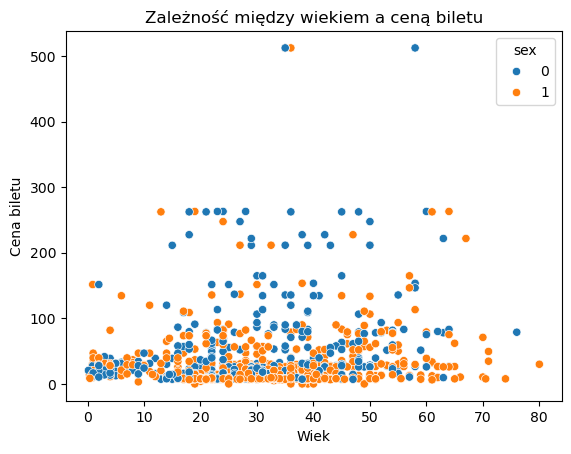

In [723]:
# Scatter dla zmiennych 'age' i 'fare'
sns.scatterplot(x='age', y='fare', data=df3, hue='sex')
plt.title('Zależność między wiekiem a ceną biletu')
plt.xlabel('Wiek')
plt.ylabel('Cena biletu')

**Wnioski zależności między wiekiem ('age') a ceną biletu ('fare')**
- Najwyższą cenę biletu płacili pasażerowie w przedziale wiekowym 15 - 65 lat
- Najniższy zakres cenowy biletu przypada na pasażerów w przedziale wiekowych 70+
- Wyraźna luka ceny biletów na poziome oscylującym wokół 200 (nie ma analogicznej luki na żadnym poziomie cenowym)
- Większość nabywców biletów w zakresie cenowym 100 - 300 to kobiety

Text(0, 0.5, 'Posiadacze rodziców lub dzieci')

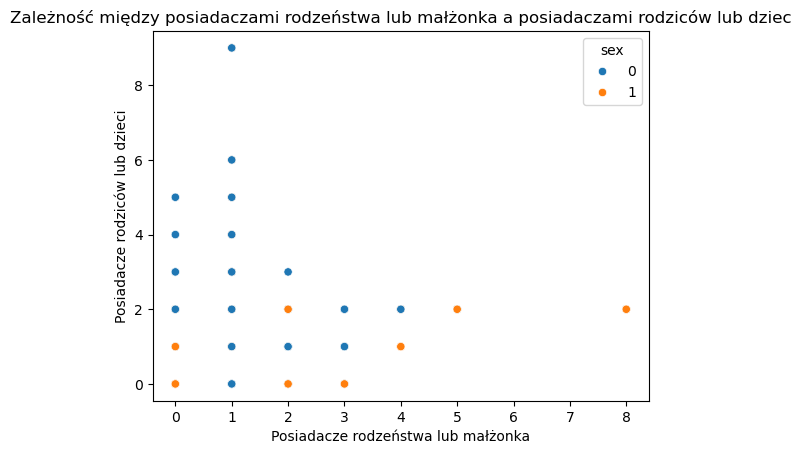

In [725]:
# Scatter dla zmiennych 'sibsp' i 'parch'
sns.scatterplot(x='sibsp', y='parch', data=df3, hue='sex')
plt.title('Zależność między posiadaczami rodzeństwa lub małżonka a posiadaczami rodziców lub dziec')
plt.xlabel('Posiadacze rodzeństwa lub małżonka')
plt.ylabel('Posiadacze rodziców lub dzieci')

**Wnioski zależności między posiadaniem rodzeństwa lub małżonka na pokładzie ('sibsp') a posiadaniem rodziców lub dzieci ('parch')**
- Największa liczba bliskich kumuluje się w przypadkach posiadających 2 rodziców/dzieci.
- Największa liczba bliskich kumuluje się w przypadkach posiadających 1 rodzeństwa/małżonka. Większość z tych osób to kobiety.
- Sporadyczne przypadki gdzie posiadacz 1 rodzeństwa/małżonka posiada więcej niż 8 rodziców/dzieci.
- Sporadyczne przypadki gdzie posiadacz 2 rodziców/dzieci posiada 8 rodzeństwa/małżonka.

Text(0, 0.5, 'Cena biletu')

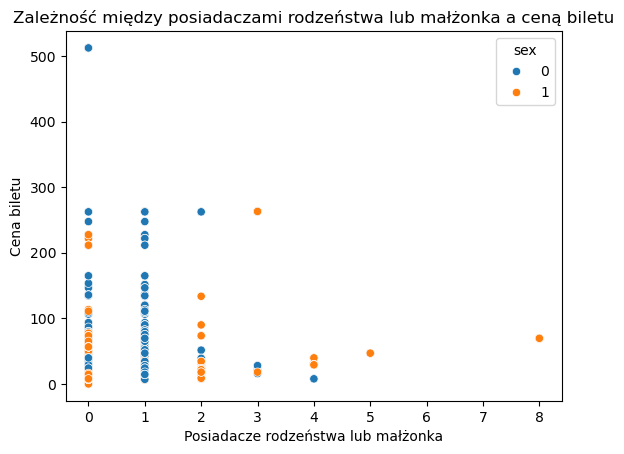

In [727]:
# Scatter dla zmiennych 'sibsp' i 'fare'
sns.scatterplot(x='sibsp', y='fare', data=df3, hue='sex')
plt.title('Zależność między posiadaczami rodzeństwa lub małżonka a ceną biletu')
plt.xlabel('Posiadacze rodzeństwa lub małżonka')
plt.ylabel('Cena biletu')

**Wnioski zależności między posiadaniem rodzeństwa lub małżonka na pokładzie ('sibsp') a ceną biletu ('fare')**
- Najdroższe bilety zakupiły osoby samotne lub posiadacze 1 rodzeństwa/małżonka. W grupie posiadaczy 1 rodzeństwa/małżonka przodują kobiety.
- Osoby posiadające 8 rodzeństwa/małżonka zapłaciły cenę biletu z niższego zakresu rozpiętości cenowej.
- Największą rentowność armator czerpał ze sprzedaży biletów dla osób samotnych lub posiadających do 2 rodzeństwa/małżonka.

Text(0, 0.5, 'Cena biletu')

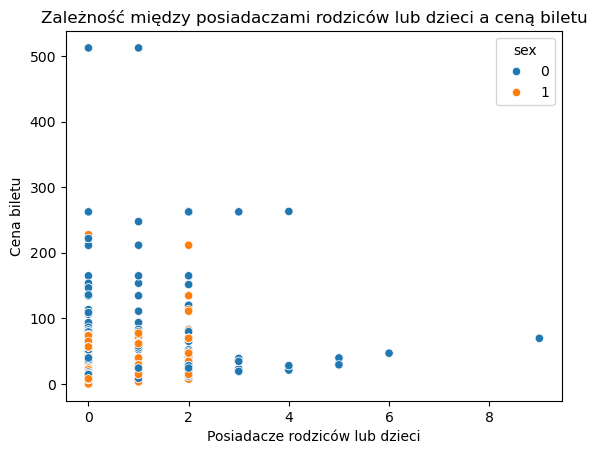

In [728]:
# Scatter dla zmiennych 'parch' i 'fare'
sns.scatterplot(x='parch', y='fare', data=df3, hue='sex')
plt.title('Zależność między posiadaczami rodziców lub dzieci a ceną biletu')
plt.xlabel('Posiadacze rodziców lub dzieci')
plt.ylabel('Cena biletu')

**Wnioski zależności między posiadaniem rodziców lub dzieci na pokładzie ('parch') a ceną biletu ('fare')**
- Najdroższe bilety zakupił osoby samotne oraz posiadacze 1 rodzica/dziecka.
- Osoby posiadające 5+ rodziców/dzieci zapłaciły cenę biletu z niższego zakresu rozpiętości cenowej.
- Największą rentowność armator czerpał ze sprzedaży biletów dla osób samotnych lub posiadających do 2 rodziców/dzieci.

# **5. Testowanie hipotez**

## **5.1. Testy statystyczne**

### **5.1.1. Test chi-kwadrat - analiza zależności między zmiennymi kategorialnymi**
> Służy do oceny zależności pomiędzy dwiema zmiennymi jakościowymi (nominalnymi lub porządkowymi). Innymi słowy, pozwala nam odpowiedzieć na pytanie, czy dwie cechy są ze sobą powiązane.

#### Hipoteza 1. Zależność między płcią ('sex') a przeżywalnością ('survived')

In [757]:
# Badanie zależności między zmienną 'sex' a 'survived'
chi2_df3 = df3[["sex", "survived"]]
contingency_table = pd.crosstab(chi2_df3['sex'], chi2_df3['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-squared statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)

if p < 0.05:
    print("Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.")
else:
    print("Hipoteza zerowa (H0): nie ma zależności między zmiennymi")

Chi-squared statistic: 363.6179084388249
p-value: 4.589924936952945e-81
Degrees of freedom: 1
Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.


**Wnioski z badania zależności między płcią ('sex') a przeżywalnością ('survived')**
- **Związek:** Tak duża wartość statystyki chi-kwadrat i niezwykle mała wartość p wskazują na ekstremalnie silny związek między badanymi zmiennymi.
- **Nieprzypadkowość:** Obserwowane różnice są zdecydowanie zbyt duże, aby uznać je za przypadkowe.
- **Potwierdzenie zależności:** Wyniki testu potwierdzają, że istnieje bardzo wyraźna zależność między zmiennymi.

**Interpretacja**
Bardzo mała wartość p (praktycznie równa zeru) oznacza, że odrzucamy hipotezę zerową i przyjmujemy hipotezę alternatywną. To z kolei oznacza, że istnieje bardzo silna statystyczna zależność między badanymi zmiennymi.

#### Hipoteza 2. Zależność między wiekiem ('age') a przeżywalnością ('survived')

In [761]:
# Badanie zależności między zmienną 'age' a 'survived'
chi2_df3 = df3[["age", "survived"]]
contingency_table = pd.crosstab(chi2_df3['age'], chi2_df3['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-squared statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)

if p < 0.05:
    print("Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.")
else:
    print("Hipoteza zerowa (H0): nie ma zależności między zmiennymi")

Chi-squared statistic: 125.04652842023077
p-value: 0.029131950741358062
Degrees of freedom: 97
Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.


**Wnioski z badania zależności między wiekiem ('age') a przeżywalnością ('survived')**
- **Związek:** Duża wartość statystyki chi-kwadrat i mała wartość p wskazują na istotny związek między badanymi zmiennymi.
- **Nieprzypadkowość:** Obserwowane różnice są zbyt duże, aby uznać je za przypadkowe.
- **Potwierdzenie zależności:** Wyniki testu potwierdzają, że istnieje zależność między zmiennymi.

**Interpretacja** Mała wartość p (mniejsza niż 0.05) oznacza, że odrzucamy hipotezę zerową i przyjmujemy hipotezę alternatywną. To z kolei oznacza, że istnieje statystycznie istotna zależność między badanymi zmiennymi.

#### Hipoteza 3. Zależność między posiadaniem rodzeństwa lub małżonka na pokładzie ('sibsp') a przeżywalnością ('survived')

In [763]:
# Badanie zależności między zmienną 'sibsp' a 'survived'
chi2_df3 = df3[["sibsp", "survived"]]
contingency_table = pd.crosstab(chi2_df3['sibsp'], chi2_df3['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-squared statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)

if p < 0.05:
    print("Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.")
else:
    print("Hipoteza zerowa (H0): nie ma zależności między zmiennymi")

Chi-squared statistic: 43.499378882211154
p-value: 9.289432216905344e-08
Degrees of freedom: 6
Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.


**Wnioski z badania zależności między posiadaniem rodzeństwa lub małżonka na pokładzie ('sibsp') a przeżywalnością ('survived')**
- **Związek:** Duża wartość statystyki chi-kwadrat i bardzo mała wartość p wskazują na silny związek między badanymi zmiennymi.
- **Nieprzypadkowość:** Obserwowane różnice są zdecydowanie zbyt duże, aby uznać je za przypadkowe.
- **Potwierdzenie zależności:** Wyniki testu potwierdzają, że istnieje zależność między zmiennymi.

**Interpretacja** Bardzo mała wartość p (praktycznie równa zeru) oznacza, że odrzucamy hipotezę zerową i przyjmujemy hipotezę alternatywną. To z kolei oznacza, że istnieje bardzo silna statystyczna zależność między badanymi zmiennymi.

#### Hipoteza 4. Zależność między posiadaniem rodziców lub dzieci na pokładzie ('parch') a przeżywalnością ('survived')

In [764]:
# Badanie zależności między zmienną 'parch' a 'survived'
chi2_df3 = df3[["parch", "survived"]]
contingency_table = pd.crosstab(chi2_df3['parch'], chi2_df3['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-squared statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)

if p < 0.05:
    print("Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.")
else:
    print("Hipoteza zerowa (H0): nie ma zależności między zmiennymi")

Chi-squared statistic: 53.87933499550338
p-value: 2.4847460235093466e-09
Degrees of freedom: 7
Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.


**Wnioski z badania zależności między posiadaniem rodziców lub dzieci na pokładzie ('parch') a przeżywalnością ('survived')**
- **Związek:** Duża wartość statystyki chi-kwadrat i bardzo mała wartość p wskazują na silny związek między badanymi zmiennymi.
- **Nieprzypadkowość:** Obserwowane różnice są zdecydowanie zbyt duże, aby uznać je za przypadkowe.
- **Potwierdzenie zależności:** Wyniki testu potwierdzają, że istnieje zależność między zmiennymi.

**Interpretacja** Bardzo mała wartość p (praktycznie równa zeru) oznacza, że odrzucamy hipotezę zerową i przyjmujemy hipotezę alternatywną. To z kolei oznacza, że istnieje bardzo silna statystyczna zależność między badanymi zmiennymi.

#### Hipoteza 5. Zależność między klasą ('pclass') a przeżywalnością ('survived')

In [760]:
# Badanie zależności między zmienną 'pclass' a 'survived'
chi2_df3 = df3[["pclass", "survived"]]
contingency_table = pd.crosstab(chi2_df3['pclass'], chi2_df3['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-squared statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)

if p < 0.05:
    print("Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.")
else:
    print("Hipoteza zerowa (H0): nie ma zależności między zmiennymi")

Chi-squared statistic: 127.85915643930326
p-value: 1.7208259588256173e-28
Degrees of freedom: 2
Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.


**Wnioski z badania zależności między klasą ('pclass') a przeżywalnością ('survived')**
- **Związek:** Tak duża wartość statystyki chi-kwadrat i niezwykle mała wartość p wskazują na bardzo silny związek między badanymi zmiennymi.
- **Nieprzypadkowość:** Obserwowane różnice są zdecydowanie zbyt duże, aby uznać je za przypadkowe.
- **Potwierdzenie zależności:** Wyniki testu potwierdzają, że istnieje zależność między zmiennymi.

**Interpretacja** Bardzo mała wartość p (praktycznie równa zeru) oznacza, że odrzucamy hipotezę zerową i przyjmujemy hipotezę alternatywną. To z kolei oznacza, że istnieje bardzo silna statystyczna zależność między badanymi zmiennymi.

#### Hipoteza 6. Zależność między ceną biletu ('fare') a przeżywalnością ('survived')

In [759]:
# Badanie zależności między zmienną 'fare' a 'survived'
chi2_df3 = df3[["fare", "survived"]]
contingency_table = pd.crosstab(chi2_df3['fare'], chi2_df3['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-squared statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)

if p < 0.05:
    print("Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.")
else:
    print("Hipoteza zerowa (H0): nie ma zależności między zmiennymi")

Chi-squared statistic: 564.0463110308622
p-value: 2.6152578703833924e-21
Degrees of freedom: 280
Hipoteza alternatywna (H1): istnieje zależność między zmiennymi.


**Wnioski z badania zależności między ceną biletu ('fare') a przeżywalnością ('survived')**
- **Związek:** Tak duża wartość statystyki chi-kwadrat i niezwykle mała wartość p wskazują na ekstremalnie silny związek między badanymi zmiennymi.
- **Nieprzypadkowość:** Obserwowane różnice są zdecydowanie zbyt duże, aby uznać je za przypadkowe.
- **Potwierdzenie zależności:** Wyniki testu potwierdzają, że istnieje bardzo wyraźna zależność między zmiennymi.

**Interpretacja**
Bardzo mała wartość p (praktycznie równa zeru) oznacza, że odrzucamy hipotezę zerową i przyjmujemy hipotezę alternatywną. To z kolei oznacza, że istnieje bardzo silna statystyczna zależność między badanymi zmiennymi.

# **6. Dokumentacja i raportowanie wyników**

## **6.1. Wnioski**

Celem analizy było pozyskanie odpowiedzi na poniższe pytanie:

> Jakie cechy demograficzne (płeć, wiek) i społeczno-ekonomiczne (sponinowacenie, klasa biletu, cena biletu) pasażerów miały wpływ na ich szanse przeżycia katastrofy?

Zatem odpowiedź na powyższe:

#### Cechy demograficzne

**sex**
- **kluczowe wnioski**
    - Płeć była silnym predyktorem przeżycia na Titanicu. Kobiety miały znacznie większe szanse na uratowanie niż mężczyźni.
    - Różnica w przeżywalności między płciami była statystycznie istotna. Test chi-kwadrat potwierdził, że ten związek nie jest przypadkowy.
    - Kobiety częściej podróżowały z dziećmi lub rodzicami. To może sugerować, że kobiety były bardziej skłonne do zajmowania się rodziną w obliczu zagrożenia, co mogło wpłynąć na ich decyzje dotyczące ewakuacji.
    - Mężczyźni wykazali się heroizmem i altruizmem. Choć mieli mniejsze szanse na przeżycie, zdecydowali się pomagać innym, co przyczyniło się do uratowania wielu istnień.
- **interpretacja**
    - **Kwestie społeczne:** Wyniki badań odzwierciedlają panujące wówczas normy społeczne, które przyznawały kobietom i dzieciom pierwszeństwo w sytuacjach kryzysowych.
    - **Konsekwencje dla przyszłości:** Katastrofa Titanica miała ogromny wpływ na rozwój przepisów dotyczących bezpieczeństwa na morzu. Wyniki tych badań mogą pomóc w lepszym zrozumieniu, dlaczego takie przepisy zostały wprowadzone.

**age**
- **kluczowe wnioski**
    - Wiek był zróżnicowany wśród pasażerów Titanica. Były zarówno dzieci, jak i osoby w podeszłym wieku.
    - Nie było silnej korelacji między wiekiem a przeżyciem. Oznacza to, że wiek sam w sobie nie był głównym czynnikiem determinującym szanse na uratowanie.
    - Była słaba korelacja ujemna między wiekiem a liczbą rodzeństwa/małżonków. Młodsi pasażerowie częściej podróżowali z rodziną.
    - Istniała silna korelacja ujemna między wiekiem a klasą biletu. Starsze osoby częściej podróżowały pierwszą klasą.
    - Rozkład wieku był lekko prawostronny asymetryczny. Oznacza to, że było więcej młodszych pasażerów niż starszych.
- **interpretacja**
    - **Różnorodność pasażerów:** Na pokładzie Titanica znalazła się bardzo zróżnicowana grupa ludzi pod względem wieku, co odzwierciedlało różnorodność społeczną tamtych czasów.
    - **Klasa społeczna i wiek:** Starsze osoby częściej podróżowały pierwszą klasą, co może świadczyć o większej zamożności i możliwościach finansowych tej grupy.
    - **Rodzina:** Młodsi pasażerowie częściej podróżowali z rodziną, co sugeruje, że rodziny z dziećmi wybierały tańsze klasy.

#### Cechy społeczno-ekonomiczne

**sibsp / parch**
- **kluczowe wnioski**
    - Większość pasażerów podróżowała samotnie lub z jedną osobą. Zarówno dla 'sibsp', jak i 'parch', mediana wynosiła 0, co wskazuje, że większość pasażerów nie miała na pokładzie rodzeństwa, małżonków, rodziców ani dzieci.
    - Silna korelacja między 'sibsp' i 'parch'. Osoby posiadające rodzeństwo lub małżonków częściej miały również rodziców lub dzieci, co sugeruje, że całe rodziny podróżowały razem.
    - Wpływ na przeżywalność - chociaż test chi-kwadrat wykazał statystycznie istotny związek między posiadaniem rodzeństwa/małżonków lub rodziców/dzieci a przeżyciem, nie można jednoznacznie stwierdzić, że te zmienne były bezpośrednią przyczyną wyższej lub niższej szansy na przeżycie. Inne czynniki, takie jak klasa biletu czy płeć, mogły mieć większy wpływ.
    - Rozkład asymetryczny: Zarówno dla 'sibsp', jak i 'parch', rozkład był silnie prawostronny asymetryczny, co oznacza, że większość wartości skupiała się wokół zera, a niewielka liczba osób miała znacznie większą liczbę członków rodziny na pokładzie.
- **interpretacja**
    - **Struktura rodzin:** Dane sugerują, że rodziny podróżowały razem, zwłaszcza większe rodziny.
    - **Emigracja:** Duża liczba pasażerów podróżujących samotnie może sugerować, że wielu z nich było emigrantami udającymi się do nowego kraju.
    - **Klasa społeczna:** Możliwe, że osoby z wyższych klas społecznych częściej podróżowały z rodziną, co mogło być związane z większą swobodą finansową.

**pclass**
- **kluczowe wnioski**
    - Klasa biletu była silnym predyktorem przeżycia. Pasażerowie pierwszej klasy mieli znacznie większe szanse na uratowanie niż pasażerowie drugiej i trzeciej klasy.
    - Silna korelacja między klasą biletu a ceną. Pasażerowie pierwszej klasy płacili najwięcej za swoje bilety.
    - Nierównomierny rozkład przeżywalności między klasami. Najwyższy odsetek ocalałych był wśród pasażerów pierwszej klasy, a najniższy wśród pasażerów trzeciej klasy.
- **interpretacja**
    - **Przywileje klasy pierwszej:** Pasażerowie pierwszej klasy mieli dostęp do lepszych części statku, w tym do łodzi ratunkowych, co dawało im większe szanse na ewakuację.
    - **Kwestie społeczne:** Różnice w przeżywalności między klasami odzwierciedlają nierówności społeczne tamtych czasów.
    - **Polityka ratunkowa:** Procedury ratunkowe faworyzowały osoby z wyższych klas społecznych.

**fare**
- **kluczowe wnioski**
    - Silna korelacja między ceną biletu a klasą. Pasażerowie pierwszej klasy płacili znacznie więcej niż pasażerowie drugiej i trzeciej klasy.
    - Słaba, dodatnia korelacja między ceną biletu a przeżywalnością. Chociaż nie jest to silny związek, istnieje tendencja, że osoby płacące więcej miały nieco większe szanse na przeżycie.
    - Duża różnorodność cen. Ceny biletów wykazywały bardzo duże zróżnicowanie, od bardzo niskich po ekstremalnie wysokie.
    - Asymetria rozkładu. Rozkład cen był silnie prawostronny asymetryczny, co oznacza, że większość pasażerów płaciła relatywnie niskie ceny, a niewielka grupa osób płaciła znacznie więcej.
- **interpretacja**
    - **Standard podróży:** Wyższa cena biletu wiązała się z lepszym standardem podróży, co obejmowało między innymi lepsze położenie kabiny, dostęp do innych udogodnień oraz, co najważniejsze, lepszy dostęp do łodzi ratunkowych.
    - **Status społeczny:** Wysoka cena biletu często była związana z wyższym statusem społecznym pasażera, co mogło przełożyć się na lepsze traktowanie podczas ewakuacji.
    - **Polityka ratunkowa:** Procedury ratunkowe faworyzowały osoby z wyższych klas społecznych, co było odzwierciedlone w wyższej cenie biletów.

#### Konkluzja

Podsumowując, katastrofa Titanica była tragicznym wydarzeniem, które ujawniło głębokie nierówności społeczne i braki w systemie bezpieczeństwa na morzu. 
- Status społeczny był kluczowym czynnikiem. Pasażerowie z wyższym statusem społecznym, odzwierciedlonym przez klasę biletu i cenę biletu, mieli znacznie większe szanse na przeżycie.
- Płeć była kolejnym istotnym czynnikiem. Kobiety, ze względu na panujące wówczas normy społeczne, miały pierwszeństwo podczas ewakuacji.
- Inne czynniki, takie jak wiek i rozmiar rodziny, również miały pewien wpływ, ale ich znaczenie było mniejsze.

## **6.2. Pytania do dalszych badań**

**sex**
- **Wiek:** Czy wiek kobiety miał wpływ na jej szanse na przeżycie? Czy młodsze kobiety miały większe szanse niż starsze?
- **Klasa społeczna:** Czy przynależność do danej klasy społecznej modyfikowała wpływ płci na przeżywalność?
- **Rodzaj biletu:** Czy posiadanie biletu pierwszej klasy zwiększało szanse na przeżycie dla obu płci?
- **Miejsce na statku:** Czy lokalizacja kabiny lub miejsca na pokładzie podczas ewakuacji miała znaczenie dla przeżywalności?

**age**
- **Interakcja wieku i płci:** Czy wiek miał różne znaczenie dla przeżywalności mężczyzn i kobiet?
- **Wiek i klasa społeczna:** Czy interakcja między wiekiem a klasą społeczną wpływała na szanse na przeżycie?
- **Dzieci:** Czy wiek dzieci miał wpływ na ich szanse na przeżycie? Czy młodsze dzieci miały większe szanse niż starsze?
- **Osoby starsze:** Dlaczego tak niewielu starszych pasażerów przeżyło? Czy było to związane ze zdrowiem, czy też z innymi czynnikami?

**sibsp / parch**
- **Interakcja z innymi zmiennymi:** Jak interakcja między 'sibsp', 'parch' i innymi zmiennymi (np. płeć, klasa biletu) wpływała na przeżywalność?
- **Rozmiar rodziny i przeżywalność:** Czy istnieje optymalny rozmiar rodziny, który zwiększałby szanse na przeżycie?
- **Miejsce na statku:** Czy rodziny były rozmieszczone w określonych częściach statku, co mogło wpływać na ich szanse na ewakuację?

**pclass**
- **Interakcja klasy biletu z innymi zmiennymi:** Jak interakcja między klasą biletu a innymi zmiennymi (np. płeć, wiek) wpływała na przeżywalność?
- **Lokalizacja kabin:** Czy lokalizacja kabiny w zależności od klasy biletu miała wpływ na szanse na ewakuację?
- **Czas dostępu do łodzi ratunkowych:** Czy pasażerowie różnych klas mieli różny czas dostępu do łodzi ratunkowych?

**fare**
- **Interakcja ceny biletu z innymi zmiennymi:** Jak interakcja między ceną biletu a innymi zmiennymi (np. płeć, wiek, klasa biletu) wpływała na przeżywalność?
- **Lokalizacja kabin i cena biletu:** Czy istniała zależność między ceną biletu a lokalizacją kabiny?
- **Czas dostępu do łodzi ratunkowych:** Czy pasażerowie płacący wyższe ceny mieli lepszy dostęp do łodzi ratunkowych?